In [1]:
import os
import numpy as np
import pandas as pd

from ludwig import logging
from ludwig.api import LudwigModel

/home/bakirillov/anaconda3/envs/lapki/lib/python3.8/site-packages/typeguard/__init__.py:906: UserWarning: no type annotations present -- not typechecking tensorflow_addons.layers.max_unpooling_2d.MaxUnpooling2D.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


In [3]:
train_features = pd.read_csv("train_features.csv", index_col=0)

In [4]:
test_features =  pd.read_csv("test_features.csv", index_col=0)

In [5]:
train_features.shape

(23814, 875)

In [6]:
test_features.shape

(3982, 875)

In [7]:
train_targets_scored = pd.read_csv("train_targets_scored.csv", index_col=0)

In [8]:
train_targets_scored.shape

(23814, 206)

In [14]:
np.sum(train_targets_scored.values, 1)

array([1, 0, 3, ..., 0, 1, 0])

(array([9.3670e+03, 1.2532e+04, 1.5380e+03, 0.0000e+00, 3.0300e+02,
        5.5000e+01, 0.0000e+00, 1.3000e+01, 0.0000e+00, 6.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

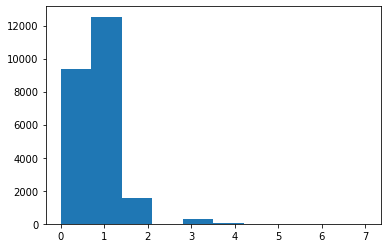

In [16]:
plt.hist(np.sum(train_targets_scored.values, 1))

train_features.csv - Features for the training set. Features g- signify gene expression data, and c- signify cell viability data. cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs; cp_time and cp_dose indicate treatment duration (24, 48, 72 hours) and dose (high or low). 

cp_type, cp_time, cp_dose - categorical

The rest are numeric

In [11]:
input_features = [
    {"name": "cp_type", "type": "binary"},
    {"name": "cp_time", "type": "category"},
    {"name": "cp_dose", "type": "category"},
]
input_features.extend(
    [{"name": a, "type": "numerical"} for a in train_features.columns[3:]]
)

In [23]:
output_features = [{"name": a, "type": "numerical"} for a in train_targets_scored.columns]

In [24]:
model_definition = {
    "input_features": input_features,
    "output_features": output_features
}

In [25]:
model = LudwigModel(model_definition, logging_level=logging.DEBUG)

In [36]:
train_df = pd.DataFrame(
    np.concatenate([train_features.values, train_targets_scored], 1)
)

In [40]:
train_df.columns = train_features.columns.tolist() + train_targets_scored.columns.tolist()

In [42]:
train_stats = model.train(train_df)

Experiment name: api_experiment
Model name: run
Output directory: results/api_experiment_run_0


ludwig_version: '0.3.3'
command: ('/home/bakirillov/anaconda3/envs/lapki/lib/python3.8/site-packages/ipykernel_launcher.py '
 '-f '
 '/home/bakirillov/.local/share/jupyter/runtime/kernel-dd814a83-d3e0-40bf-a225-277befe65fe5.json')
random_seed: 42
data_format: "<class 'pandas.core.frame.DataFrame'>"
config: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'column': 'cp_type',
                              'name': 'cp_type',
                              'proc_column': 'cp_type_mZFLky',
                              'tied': None,
                              'type': 'binary'},
                          {   'column': 'cp_time',
                              'name': 'cp_time',
                              'proc_column': 'cp_time_mZFLky',
                              'tied': None,
                              'type': 'category'},
                          {   'column': 'cp_d

tf_version: '2.4.1'


Using full dataframe
Building dataset (it may take a while)
Training set: 16647
Validation set: 2373
Test set: 4794

╒═══════╕
│ MODEL │
╘═══════╛

Input binary feature cp_type
 binary_passthrough_encoder
Input category feature cp_time
 categorical_embed_encoder
  Embed
  embedding_size (50) is greater than vocab_size (4). Setting embedding size to be equal to vocab_size.
Input category feature cp_dose
 categorical_embed_encoder_1
  Embed
  embedding_size (50) is greater than vocab_size (3). Setting embedding size to be equal to vocab_size.
Input numerical feature g-0
 passthrough_encoder
Input numerical feature g-1
 passthrough_encoder_1
Input numerical feature g-2
 passthrough_encoder_2
Input numerical feature g-3
 passthrough_encoder_3
Input numerical feature g-4
 passthrough_encoder_4
Input numerical feature g-5
 passthrough_encoder_5
Input numerical feature g-6
 passthrough_encoder_6
Input numerical feature g-7
 passthrough_encoder_7
Input numerical feature g

Input numerical feature g-143
 passthrough_encoder_143
Input numerical feature g-144
 passthrough_encoder_144
Input numerical feature g-145
 passthrough_encoder_145
Input numerical feature g-146
 passthrough_encoder_146
Input numerical feature g-147
 passthrough_encoder_147
Input numerical feature g-148
 passthrough_encoder_148
Input numerical feature g-149
 passthrough_encoder_149
Input numerical feature g-150
 passthrough_encoder_150
Input numerical feature g-151
 passthrough_encoder_151
Input numerical feature g-152
 passthrough_encoder_152
Input numerical feature g-153
 passthrough_encoder_153
Input numerical feature g-154
 passthrough_encoder_154
Input numerical feature g-155
 passthrough_encoder_155
Input numerical feature g-156
 passthrough_encoder_156
Input numerical feature g-157
 passthrough_encoder_157
Input numerical feature g-158
 passthrough_encoder_158
Input numerical feature g-159
 passthrough_encoder_159
Input numerical feature g-160
 passthrough_encoder_160
Input nume

Input numerical feature g-292
 passthrough_encoder_292
Input numerical feature g-293
 passthrough_encoder_293
Input numerical feature g-294
 passthrough_encoder_294
Input numerical feature g-295
 passthrough_encoder_295
Input numerical feature g-296
 passthrough_encoder_296
Input numerical feature g-297
 passthrough_encoder_297
Input numerical feature g-298
 passthrough_encoder_298
Input numerical feature g-299
 passthrough_encoder_299
Input numerical feature g-300
 passthrough_encoder_300
Input numerical feature g-301
 passthrough_encoder_301
Input numerical feature g-302
 passthrough_encoder_302
Input numerical feature g-303
 passthrough_encoder_303
Input numerical feature g-304
 passthrough_encoder_304
Input numerical feature g-305
 passthrough_encoder_305
Input numerical feature g-306
 passthrough_encoder_306
Input numerical feature g-307
 passthrough_encoder_307
Input numerical feature g-308
 passthrough_encoder_308
Input numerical feature g-309
 passthrough_encoder_309
Input nume

Input numerical feature g-441
 passthrough_encoder_441
Input numerical feature g-442
 passthrough_encoder_442
Input numerical feature g-443
 passthrough_encoder_443
Input numerical feature g-444
 passthrough_encoder_444
Input numerical feature g-445
 passthrough_encoder_445
Input numerical feature g-446
 passthrough_encoder_446
Input numerical feature g-447
 passthrough_encoder_447
Input numerical feature g-448
 passthrough_encoder_448
Input numerical feature g-449
 passthrough_encoder_449
Input numerical feature g-450
 passthrough_encoder_450
Input numerical feature g-451
 passthrough_encoder_451
Input numerical feature g-452
 passthrough_encoder_452
Input numerical feature g-453
 passthrough_encoder_453
Input numerical feature g-454
 passthrough_encoder_454
Input numerical feature g-455
 passthrough_encoder_455
Input numerical feature g-456
 passthrough_encoder_456
Input numerical feature g-457
 passthrough_encoder_457
Input numerical feature g-458
 passthrough_encoder_458
Input nume

Input numerical feature g-590
 passthrough_encoder_590
Input numerical feature g-591
 passthrough_encoder_591
Input numerical feature g-592
 passthrough_encoder_592
Input numerical feature g-593
 passthrough_encoder_593
Input numerical feature g-594
 passthrough_encoder_594
Input numerical feature g-595
 passthrough_encoder_595
Input numerical feature g-596
 passthrough_encoder_596
Input numerical feature g-597
 passthrough_encoder_597
Input numerical feature g-598
 passthrough_encoder_598
Input numerical feature g-599
 passthrough_encoder_599
Input numerical feature g-600
 passthrough_encoder_600
Input numerical feature g-601
 passthrough_encoder_601
Input numerical feature g-602
 passthrough_encoder_602
Input numerical feature g-603
 passthrough_encoder_603
Input numerical feature g-604
 passthrough_encoder_604
Input numerical feature g-605
 passthrough_encoder_605
Input numerical feature g-606
 passthrough_encoder_606
Input numerical feature g-607
 passthrough_encoder_607
Input nume

Input numerical feature g-739
 passthrough_encoder_739
Input numerical feature g-740
 passthrough_encoder_740
Input numerical feature g-741
 passthrough_encoder_741
Input numerical feature g-742
 passthrough_encoder_742
Input numerical feature g-743
 passthrough_encoder_743
Input numerical feature g-744
 passthrough_encoder_744
Input numerical feature g-745
 passthrough_encoder_745
Input numerical feature g-746
 passthrough_encoder_746
Input numerical feature g-747
 passthrough_encoder_747
Input numerical feature g-748
 passthrough_encoder_748
Input numerical feature g-749
 passthrough_encoder_749
Input numerical feature g-750
 passthrough_encoder_750
Input numerical feature g-751
 passthrough_encoder_751
Input numerical feature g-752
 passthrough_encoder_752
Input numerical feature g-753
 passthrough_encoder_753
Input numerical feature g-754
 passthrough_encoder_754
Input numerical feature g-755
 passthrough_encoder_755
Input numerical feature g-756
 passthrough_encoder_756
Input nume

 regressor_7
  Dense
Output numerical feature adenylyl_cyclase_activator
 output feature fully connected layers
  FCStack
 regressor_8
  Dense
Output numerical feature adrenergic_receptor_agonist
 output feature fully connected layers
  FCStack
 regressor_9
  Dense
Output numerical feature adrenergic_receptor_antagonist
 output feature fully connected layers
  FCStack
 regressor_10
  Dense
Output numerical feature akt_inhibitor
 output feature fully connected layers
  FCStack
 regressor_11
  Dense
Output numerical feature aldehyde_dehydrogenase_inhibitor
 output feature fully connected layers
  FCStack
 regressor_12
  Dense
Output numerical feature alk_inhibitor
 output feature fully connected layers
  FCStack
 regressor_13
  Dense
Output numerical feature ampk_activator
 output feature fully connected layers
  FCStack
 regressor_14
  Dense
Output numerical feature analgesic
 output feature fully connected layers
  FCStack
 regressor_15
  Dense
Output numerical feature androgen_recepto

  FCStack
 regressor_76
  Dense
Output numerical feature dna_inhibitor
 output feature fully connected layers
  FCStack
 regressor_77
  Dense
Output numerical feature dopamine_receptor_agonist
 output feature fully connected layers
  FCStack
 regressor_78
  Dense
Output numerical feature dopamine_receptor_antagonist
 output feature fully connected layers
  FCStack
 regressor_79
  Dense
Output numerical feature egfr_inhibitor
 output feature fully connected layers
  FCStack
 regressor_80
  Dense
Output numerical feature elastase_inhibitor
 output feature fully connected layers
  FCStack
 regressor_81
  Dense
Output numerical feature erbb2_inhibitor
 output feature fully connected layers
  FCStack
 regressor_82
  Dense
Output numerical feature estrogen_receptor_agonist
 output feature fully connected layers
  FCStack
 regressor_83
  Dense
Output numerical feature estrogen_receptor_antagonist
 output feature fully connected layers
  FCStack
 regressor_84
  Dense
Output numerical feature f

 output feature fully connected layers
  FCStack
 regressor_145
  Dense
Output numerical feature p38_mapk_inhibitor
 output feature fully connected layers
  FCStack
 regressor_146
  Dense
Output numerical feature p-glycoprotein_inhibitor
 output feature fully connected layers
  FCStack
 regressor_147
  Dense
Output numerical feature parp_inhibitor
 output feature fully connected layers
  FCStack
 regressor_148
  Dense
Output numerical feature pdgfr_inhibitor
 output feature fully connected layers
  FCStack
 regressor_149
  Dense
Output numerical feature pdk_inhibitor
 output feature fully connected layers
  FCStack
 regressor_150
  Dense
Output numerical feature phosphodiesterase_inhibitor
 output feature fully connected layers
  FCStack
 regressor_151
  Dense
Output numerical feature phospholipase_inhibitor
 output feature fully connected layers
  FCStack
 regressor_152
  Dense
Output numerical feature pi3k_inhibitor
 output feature fully connected layers
  FCStack
 regressor_153
  De

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ 11-beta-hsd1_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │         r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════════╡
│ train                    │ 0.8095 │  0.1432 │               0.8095 │                0.6370 │  -964.6912 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ vali                     │ 0.9395 │  0.1633 │               0.9395 │                0.6618 │ -2242.8628 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ test                     │ 0.7991 │  0.1429 │               0.7991 │                0.6322 │ -1265.8263 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════════╛
╒══════════════════╤════════

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ adrenergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                            │ 0.7020 │  0.0403 │               0.7020 │                0.6343 │ -46.0224 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                             │ 0.6992 │  0.0466 │               0.6992 │                0.6437 │ -40.1241 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                             │ 0.7170 │  0.0268 │               0.7170 │                0.6449 │ -51.4855 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══════════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ angiogenesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                    │ 0.6792 │  0.0839 │               0.6792 │                0.6076 │ -541.2592 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                     │ 0.7476 │  0.1079 │               0.7476 │                0.6446 │ -224.0101 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                     │ 0.6802 │  0.0816 │               0.6802 │                0.6071 │ -463.1191 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════════════════════╤

╒═══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antioxidant   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train         │ 0.5019 │  0.0054 │               0.5019 │                0.5447 │ -173.6902 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali          │ 0.5427 │  0.0102 │               0.5427 │                0.5735 │ -182.3447 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test          │ 0.5071 │ -0.0000 │               0.5071 │                0.5438 │ -135.0886 │
╘═══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antiprotozoal   │   loss │   error │

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ atr_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │         r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════════╡
│ train                  │ 0.6539 │ -0.0078 │               0.6539 │                0.6218 │  -781.1470 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ vali                   │ 0.7045 │  0.0300 │               0.7045 │                0.6376 │ -1672.0671 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ test                   │ 0.6396 │  0.0199 │               0.6396 │                0.6164 │  -766.2032 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════════╛
╒═══════════════════════════╤════════╤════════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ bacterial_dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                     │ 0.6168 │  0.0671 │               0.6168 │                0.5986 │ -125.4079 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                      │ 0.6873 │  0.0932 │               0.6873 │                0.6236 │ -234.7825 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                      │ 0.6529 │  0.0636 │               0.6529 │                0.6103 │ -120.0884 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════════════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ calcium_channel_blocker   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                     │ 0.6307 │  0.0088 │               0.6307 │                0.6077 │ -56.3426 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                      │ 0.6430 │  0.0183 │               0.6430 │                0.6113 │ -40.8229 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                      │ 0.6561 │  0.0110 │               0.6561 │                0.6184 │ -54.0462 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════════════════════╤═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ cdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.5807 │ -0.0650 │               0.5807 │                0.5758 │ -41.1322 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.6060 │ -0.0738 │               0.6060 │                0.5921 │ -39.1742 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.5651 │ -0.0343 │               0.5651 │                0.5744 │ -37.6751 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ chelating_agent   │   los

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ cytochrome_p450_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                       │ 0.6031 │  0.0131 │               0.6031 │                0.5993 │ -135.9825 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                        │ 0.6690 │  0.0460 │               0.6690 │                0.6255 │ -122.0534 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                        │ 0.6247 │  0.0260 │               0.6247 │                0.6097 │ -175.9617 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ elastase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │         r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════════╡
│ train                │ 0.6152 │ -0.0422 │               0.6152 │                0.6012 │ -5141.2046 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ vali                 │ 0.7029 │ -0.0666 │               0.7029 │                0.6388 │  -inf      │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ test                 │ 0.6124 │ -0.0124 │               0.6124 │                0.6039 │  -734.1171 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adhesion_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                             │ 0.5292 │  0.0240 │               0.5292 │                0.5616 │ -796.8705 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                              │ 0.5564 │  0.0151 │               0.5564 │                0.5753 │ -inf      │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                              │ 0.5667 │  0.0370 │               0.5667 │                0.5724 │ -386.8515 │
╘═══════════════════════════════════╧════════╧═════════╧════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ glutamate_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                           │ 0.6289 │ -0.0591 │               0.6289 │                0.5977 │ -39.2142 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                            │ 0.6440 │ -0.0699 │               0.6440 │                0.6065 │ -46.1083 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                            │ 0.6415 │ -0.0639 │               0.6415 │                0.6001 │ -44.5495 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ hiv_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.5903 │ -0.0394 │               0.5903 │                0.5836 │ -213.7114 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.6412 │ -0.0189 │               0.6412 │                0.5960 │ -381.9674 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.6032 │ -0.0382 │               0.6032 │                0.5948 │ -131.0879 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ hmgcr_inhibitor  

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ integrin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.6503 │ -0.0173 │               0.6503 │                0.6170 │ -452.3771 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.6519 │ -0.0164 │               0.6519 │                0.6165 │ -193.5865 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.6695 │ -0.0054 │               0.6695 │                0.6191 │ -318.4007 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ mdm_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.8580 │ -0.1170 │               0.8580 │                0.6717 │ -652.4654 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 1.0106 │ -0.1245 │               1.0106 │                0.7185 │ -601.0240 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.8484 │ -0.0638 │               0.8484 │                0.6729 │ -808.7495 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ mek_inhibitor   │ 

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ neuropeptide_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                              │ 0.6040 │ -0.0356 │               0.6040 │                0.5945 │ -386.5834 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                               │ 0.6578 │ -0.0672 │               0.6578 │                0.6206 │ -311.9591 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                               │ 0.5929 │ -0.0238 │               0.5929 │                0.5923 │ -472.5992 │
╘════════════════════════════════════╧════════╧═════════╧═══════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ opioid_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                        │ 0.6310 │  0.0131 │               0.6310 │                0.6100 │ -151.8852 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                         │ 0.6480 │  0.0264 │               0.6480 │                0.6147 │ -153.1305 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                         │ 0.6540 │  0.0254 │               0.6540 │                0.6162 │ -184.4360 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ pi3k_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.5525 │ -0.0165 │               0.5525 │                0.5738 │  -82.5372 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.6347 │  0.0016 │               0.6347 │                0.6018 │ -150.2678 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.5906 │ -0.0034 │               0.5906 │                0.5887 │  -94.2943 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ pkc_inhib

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ prostanoid_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                            │ 0.6914 │  0.0908 │               0.6914 │                0.6221 │ -188.7902 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                             │ 0.7026 │  0.1023 │               0.7026 │                0.6280 │ -239.0052 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                             │ 0.6836 │  0.0803 │               0.6836 │                0.6197 │ -204.5930 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ retinoid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                       │ 0.6434 │  0.0229 │               0.6434 │                0.6153 │ -255.7099 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                        │ 0.6636 │  0.0182 │               0.6636 │                0.6197 │ -196.6769 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                        │ 0.6799 │  0.0271 │               0.6799 │                0.6223 │ -190.4858 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ sigma_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                       │ 0.5959 │ -0.0327 │               0.5959 │                0.5872 │ -452.9644 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                        │ 0.6106 │ -0.0251 │               0.6106 │                0.5922 │ -359.7843 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                        │ 0.5931 │ -0.0256 │               0.5931 │                0.5860 │ -283.3130 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ thrombin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │         r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════════╡
│ train                │ 0.6325 │ -0.0585 │               0.6325 │                0.6020 │ -1056.5570 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ vali                 │ 0.6868 │ -0.0728 │               0.6868 │                0.6272 │  -544.6498 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ test                 │ 0.6258 │ -0.0406 │               0.6258 │                0.5978 │  -498.5751 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════════╛
╒══════════════════════════════════╤════════╤═════════╤═════════

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ trpv_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train             │ 0.5597 │ -0.0120 │               0.5597 │                0.5806 │ -227.4425 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali              │ 0.5898 │ -0.0068 │               0.5898 │                0.5864 │ -704.2966 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test              │ 0.6063 │ -0.0121 │               0.6063 │                0.5989 │ -580.5392 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ 11-beta-hsd1_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                    │ 0.1930 │ -0.0037 │               0.1930 │                0.3401 │ -228.1697 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                     │ 0.2246 │ -0.0031 │               0.2246 │                0.3592 │ -530.3641 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                     │ 0.2092 │  0.0045 │               0.2092 │                0.3502 │ -331.8111 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════╤════════╤════════

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ adrenergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                            │ 0.2772 │  0.0248 │               0.2772 │                0.4014 │ -17.5992 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                             │ 0.2939 │  0.0306 │               0.2939 │                0.4175 │ -16.2190 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                             │ 0.2948 │  0.0162 │               0.2948 │                0.4151 │ -20.6639 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══════════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ angiogenesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                    │ 0.1905 │  0.0127 │               0.1905 │                0.3352 │ -151.0348 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                     │ 0.2235 │  0.0284 │               0.2235 │                0.3642 │  -65.9977 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                     │ 0.2008 │  0.0144 │               0.2008 │                0.3443 │ -136.2326 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════════════════════╤

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antiprotozoal   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.2458 │ -0.0084 │               0.2458 │                0.3824 │ -170.4544 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.2664 │ -0.0160 │               0.2664 │                0.3929 │ -316.5902 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.2704 │ -0.0017 │               0.2704 │                0.4018 │ -129.0819 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antiviral   │   loss │

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ aurora_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                     │ 0.1870 │  0.0106 │               0.1870 │                0.3334 │ -47.7902 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                      │ 0.2209 │  0.0104 │               0.2209 │                0.3515 │ -51.7500 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                      │ 0.2075 │  0.0064 │               0.2075 │                0.3482 │ -44.5901 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════════╤════════╤═══

╒══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ bacterial_membrane_integrity_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                    │ 0.2123 │  0.0055 │               0.2123 │                0.3557 │ -709.6827 │
├──────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                     │ 0.2477 │  0.0189 │               0.2477 │                0.3804 │ -292.8333 │
├──────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                     │ 0.2210 │  0.0140 │               0.2210 │                0.3611 │ -inf      │
╘═══════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ cannabinoid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                          │ 0.2546 │ -0.0677 │               0.2546 │                0.3724 │ -151.1824 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                           │ 0.3129 │ -0.0714 │               0.3129 │                0.4135 │ -123.5459 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                           │ 0.2812 │ -0.0564 │               0.2812 │                0.3847 │ -166.7937 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧════════════════════

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ chelating_agent   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train             │ 0.2692 │  0.0633 │               0.2692 │                0.3829 │ -114.8325 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali              │ 0.3084 │  0.0748 │               0.3084 │                0.4075 │ -104.0110 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test              │ 0.2619 │  0.0506 │               0.2619 │                0.3819 │ -155.9892 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ 

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ dihydrofolate_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                               │ 0.2054 │  0.0574 │               0.2054 │                0.3439 │ -148.5369 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                │ 0.2253 │  0.0608 │               0.2253 │                0.3598 │ -175.7747 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                │ 0.2157 │  0.0501 │               0.2157 │                0.3520 │ -103.0376 │
╘═════════════════════════════════════╧════════╧════════

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ erbb2_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │         r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════════╡
│ train             │ 0.2241 │  0.0518 │               0.2241 │                0.3518 │ -3744.9006 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ vali              │ 0.2364 │  0.0478 │               0.2364 │                0.3598 │  -inf      │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ test              │ 0.2418 │  0.0527 │               0.2418 │                0.3599 │  -inf      │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤══════════════════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ free_radical_scavenger   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                    │ 0.2054 │ -0.0219 │               0.2054 │                0.3377 │ -228.1167 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                     │ 0.2418 │ -0.0389 │               0.2418 │                0.3570 │ -inf      │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                     │ 0.2180 │ -0.0161 │               0.2180 │                0.3441 │ -346.8681 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒════════════════════════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ gonadotropin_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                           │ 0.2982 │ -0.0867 │               0.2982 │                0.3912 │ -621.5347 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                            │ 0.3367 │ -0.0967 │               0.3367 │                0.4138 │ -200.4794 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                            │ 0.3097 │ -0.0859 │               0.3097 │                0.3994 │ -246.5448 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ hmgcr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train             │ 0.2120 │  0.0128 │               0.2120 │                0.3543 │ -16.6422 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali              │ 0.2443 │  0.0086 │               0.2443 │                0.3762 │ -19.3091 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test              │ 0.2217 │  0.0079 │               0.2217 │                0.3604 │ -19.9574 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ hsp_inhib

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ jak_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.2130 │  0.0501 │               0.2130 │                0.3487 │ -54.6638 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.2287 │  0.0539 │               0.2287 │                0.3597 │ -76.9476 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.2359 │  0.0530 │               0.2359 │                0.3604 │ -52.9997 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ kit_inhibitor   │   loss │  

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ mek_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.2443 │  0.0064 │               0.2443 │                0.3744 │  -69.5714 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.2582 │  0.0185 │               0.2582 │                0.3790 │ -122.2801 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.2536 │ -0.0054 │               0.2536 │                0.3844 │ -134.5428 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ memb

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ nfkb_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.2083 │  0.0143 │               0.2083 │                0.3392 │ -5.1295 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.2359 │  0.0108 │               0.2359 │                0.3625 │ -5.2122 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.2204 │  0.0137 │               0.2204 │                0.3512 │ -6.2766 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ nicotinic_rec

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ orexin_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                        │ 0.2104 │ -0.0032 │               0.2104 │                0.3551 │ -128.0986 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                         │ 0.2439 │ -0.0137 │               0.2439 │                0.3726 │ -287.0574 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                         │ 0.2285 │ -0.0141 │               0.2285 │                0.3642 │ -136.2227 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ pkc_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.2686 │  0.0515 │               0.2686 │                0.3826 │ -194.0795 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.3148 │  0.0600 │               0.3148 │                0.4012 │ -375.4276 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.2810 │  0.0415 │               0.2810 │                0.3942 │ -224.9800 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ pota

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ proteasome_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.1843 │ -0.0253 │               0.1843 │                0.3229 │ -5.1181 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.2133 │ -0.0209 │               0.2133 │                0.3462 │ -5.6545 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.2036 │ -0.0331 │               0.2036 │                0.3347 │ -6.8270 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════════╕
│ retinoid_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │         r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════════╡
│ train                          │ 0.1974 │  0.0363 │               0.1974 │                0.3432 │  -825.5233 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ vali                           │ 0.2126 │  0.0411 │               0.2126 │                0.3545 │  -503.0202 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────────┤
│ test                           │ 0.2225 │  0.0389 │               0.2225 │                0.3605 │ -1062.2527 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧════════════

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ smoothened_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                            │ 0.2710 │  0.0528 │               0.2710 │                0.3893 │ -215.1731 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                             │ 0.3007 │  0.0587 │               0.3007 │                0.4185 │ -715.2554 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                             │ 0.3029 │  0.0481 │               0.3029 │                0.4062 │ -485.3917 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ thymidylate_synthase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                            │ 0.1916 │  0.0352 │               0.1916 │                0.3329 │ -138.2857 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                             │ 0.2158 │  0.0304 │               0.2158 │                0.3505 │ -127.2076 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                             │ 0.2114 │  0.0321 │               0.2114 │                0.3474 │ -100.9530 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ tubulin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train               │ 0.3818 │  0.0685 │               0.3818 │                0.4617 │ -27.7034 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                │ 0.4280 │  0.0868 │               0.4280 │                0.4866 │ -35.6954 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                │ 0.4014 │  0.0676 │               0.4014 │                0.4676 │ -30.0949 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤══════════════════

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ acat_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0865 │ -0.0133 │               0.0865 │                0.2203 │ -102.4726 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0980 │ -0.0139 │               0.0980 │                0.2338 │ -116.6936 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0951 │ -0.0069 │               0.0951 │                0.2283 │  -56.2498 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ akt_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0980 │ -0.0338 │               0.0980 │                0.2313 │ -38.0750 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.1130 │ -0.0290 │               0.1130 │                0.2417 │ -44.1524 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.1085 │ -0.0210 │               0.1085 │                0.2400 │ -27.8755 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ aldehyde

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ angiotensin_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                             │ 0.0774 │  0.0015 │               0.0774 │                0.2122 │ -48.8797 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                              │ 0.0903 │  0.0120 │               0.0903 │                0.2242 │ -70.9973 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                              │ 0.0850 │  0.0022 │               0.0850 │                0.2223 │ -50.3152 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antiviral   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train       │ 0.0994 │ -0.0254 │               0.0994 │                0.2371 │  -91.5153 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali        │ 0.1071 │ -0.0257 │               0.1071 │                0.2475 │ -126.1452 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test        │ 0.1034 │ -0.0127 │               0.1034 │                0.2396 │ -164.0391 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ apoptosis_stimulant   │   loss │   error │   mean

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ autotaxin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                 │ 0.0943 │  0.0055 │               0.0943 │                0.2390 │ -262.0812 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                  │ 0.1090 │ -0.0023 │               0.1090 │                0.2543 │ -inf      │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                  │ 0.1109 │  0.0028 │               0.1109 │                0.2560 │ -inf      │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════════════════════════════╤════════╤════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ bcl_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0859 │  0.0048 │               0.0859 │                0.2258 │ -67.3939 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0975 │  0.0023 │               0.0975 │                0.2403 │ -75.8875 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.1015 │ -0.0003 │               0.1015 │                0.2416 │ -68.8148 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ bcr-abl_inhibitor   │   

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ cannabinoid_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                             │ 0.0855 │  0.0002 │               0.0855 │                0.2226 │ -37.5345 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                              │ 0.0939 │ -0.0155 │               0.0939 │                0.2345 │ -54.9976 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                              │ 0.0952 │ -0.0053 │               0.0952 │                0.2343 │ -31.6790 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ chk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.0716 │ -0.0117 │               0.0716 │                0.2066 │  -65.1402 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.0817 │ -0.0232 │               0.0817 │                0.2176 │  -63.6146 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.0797 │ -0.0099 │               0.0797 │                0.2173 │ -126.3482 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ chlorid

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ dipeptidyl_peptidase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                            │ 0.1439 │  0.0455 │               0.1439 │                0.2831 │ -149.5324 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                             │ 0.1663 │  0.0577 │               0.1663 │                0.3021 │ -197.1322 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                             │ 0.1527 │  0.0376 │               0.1527 │                0.2905 │ -103.7387 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ estrogen_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                       │ 0.0884 │ -0.0280 │               0.0884 │                0.2233 │ -12.4284 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                        │ 0.1027 │ -0.0323 │               0.1027 │                0.2397 │ -15.3964 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                        │ 0.1009 │ -0.0285 │               0.1009 │                0.2400 │ -14.1639 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════

╒═══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ fungal_squalene_epoxidase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                 │ 0.0781 │  0.0315 │               0.0781 │                0.2148 │  -67.8794 │
├───────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                  │ 0.0974 │  0.0341 │               0.0974 │                0.2364 │  -76.1559 │
├───────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                  │ 0.0885 │  0.0269 │               0.0885 │                0.2277 │ -423.8881 │
╘═══════════════════════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ gsk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0889 │ -0.0352 │               0.0889 │                0.2249 │ -41.4193 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.1045 │ -0.0354 │               0.1045 │                0.2427 │ -16.8200 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0950 │ -0.0355 │               0.0950 │                0.2282 │ -40.6557 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ hcv_inhibitor   │   loss │  

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ hsp_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0727 │  0.0006 │               0.0727 │                0.2081 │ -17.4373 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0909 │  0.0059 │               0.0909 │                0.2247 │ -53.2418 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0825 │ -0.0014 │               0.0825 │                0.2210 │ -16.3437 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ igf-1_inhibitor   │   loss

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ kit_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0803 │ -0.0107 │               0.0803 │                0.2144 │ -5.9797 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0990 │ -0.0145 │               0.0990 │                0.2349 │ -8.8581 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0858 │ -0.0065 │               0.0858 │                0.2208 │ -6.5796 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ laxative   │   loss │   error │   mean_sq

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ mineralocorticoid_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.1140 │ -0.0191 │               0.1140 │                0.2578 │  -99.3908 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.1301 │ -0.0288 │               0.1301 │                0.2730 │ -154.1747 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.1232 │ -0.0232 │               0.1232 │                0.2684 │ -146.7270 │
╘═══════════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ nitric_oxide_donor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.0905 │ -0.0170 │               0.0905 │                0.2319 │  -71.2267 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.1053 │ -0.0198 │               0.1053 │                0.2448 │ -125.2754 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.1025 │ -0.0268 │               0.1025 │                0.2449 │ -163.5050 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════════════════════╤════════╤═════════╤═══════════════

╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ p-glycoprotein_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                      │ 0.0806 │ -0.0157 │               0.0806 │                0.2199 │ -102.3570 │
├────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                       │ 0.0905 │ -0.0110 │               0.0905 │                0.2294 │  -52.9726 │
├────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                       │ 0.0880 │ -0.0206 │               0.0880 │                0.2292 │  -59.4537 │
╘════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                          │ 0.0929 │  0.0217 │               0.0929 │                0.2307 │ -23.6845 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                           │ 0.1000 │  0.0406 │               0.1000 │                0.2346 │ -18.9770 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                           │ 0.1002 │  0.0164 │               0.1002 │                0.2371 │ -20.0782 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ protein_phosphatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                           │ 0.0804 │ -0.0115 │               0.0804 │                0.2191 │ -333.5409 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                            │ 0.0870 │ -0.0048 │               0.0870 │                0.2277 │ -204.4678 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                            │ 0.0847 │ -0.0115 │               0.0847 │                0.2240 │ -406.1472 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════

╒══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ribonucleoside_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                │ 0.0962 │ -0.0206 │               0.0962 │                0.2357 │  -54.1526 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                 │ 0.1086 │ -0.0238 │               0.1086 │                0.2501 │ -257.0241 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                 │ 0.1052 │ -0.0153 │               0.1052 │                0.2450 │  -71.5674 │
╘══════════════════════════════════════╧════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ sphingosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                          │ 0.0795 │ -0.0094 │               0.0795 │                0.2162 │  -65.5325 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                           │ 0.0956 │ -0.0183 │               0.0956 │                0.2359 │ -112.3957 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                           │ 0.0870 │ -0.0083 │               0.0870 │                0.2236 │ -138.1570 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧════════════════════

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tlr_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0635 │  0.0281 │               0.0635 │                0.1924 │ -175.8147 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0737 │  0.0252 │               0.0737 │                0.2028 │ -inf      │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0723 │  0.0235 │               0.0723 │                0.2025 │ -346.1907 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ tnf_inhibi

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ubiquitin_specific_protease_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0822 │ -0.0032 │               0.0822 │                0.2198 │ -274.2629 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0958 │ -0.0029 │               0.0958 │                0.2356 │ -inf      │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0918 │ -0.0007 │               0.0918 │                0.2315 │ -439.3820 │
╘═══════════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ acetylcholine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                               │ 0.0533 │  0.0175 │               0.0533 │                0.1537 │ -3.1841 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                │ 0.0587 │  0.0204 │               0.0587 │                0.1617 │ -5.3835 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                │ 0.0566 │  0.0186 │               0.0566 │                0.1597 │ -3.3630 │
╘═════════════════════════════════════╧════════╧═════════╧══════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ alk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0413 │  0.0241 │               0.0413 │                0.1493 │ -22.0563 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0486 │  0.0251 │               0.0486 │                0.1588 │ -22.1178 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0421 │  0.0217 │               0.0421 │                0.1524 │ -28.0326 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ampk_activator   │   loss 

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antiarrhythmic   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0335 │  0.0114 │               0.0335 │                0.1392 │ -185.2092 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0394 │  0.0066 │               0.0394 │                0.1497 │  -91.8597 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0382 │  0.0073 │               0.0382 │                0.1468 │  -90.3219 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antibiotic   

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ aromatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                 │ 0.0308 │  0.0088 │               0.0308 │                0.1334 │ -14.1434 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                  │ 0.0378 │  0.0087 │               0.0378 │                0.1464 │ -16.9849 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                  │ 0.0359 │  0.0062 │               0.0359 │                0.1415 │ -20.6646 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═════

╒═════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ bacterial_50s_ribosomal_subunit_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                       │ 0.0437 │ -0.0245 │               0.0437 │                0.1492 │ -11.6221 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                        │ 0.0499 │ -0.0246 │               0.0499 │                0.1605 │  -9.8963 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                        │ 0.0445 │ -0.0213 │               0.0445 │                0.1541 │ -18.5407 │


╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ beta_amyloid_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                    │ 0.0674 │ -0.0310 │               0.0674 │                0.1728 │ -74.3185 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                     │ 0.0836 │ -0.0330 │               0.0836 │                0.1890 │ -66.2780 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                     │ 0.0677 │ -0.0235 │               0.0677 │                0.1744 │ -53.2716 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════╤════════╤═════════╤

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ caspase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train               │ 0.0397 │ -0.0205 │               0.0397 │                0.1511 │ -58.7235 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                │ 0.0471 │ -0.0300 │               0.0471 │                0.1613 │ -54.6626 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                │ 0.0419 │ -0.0232 │               0.0419 │                0.1570 │ -39.3169 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ cholinergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                             │ 0.0435 │ -0.0282 │               0.0435 │                0.1461 │ -17.7107 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                              │ 0.0504 │ -0.0339 │               0.0504 │                0.1578 │ -39.3198 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                              │ 0.0476 │ -0.0233 │               0.0476 │                0.1542 │ -18.1562 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0946 │ -0.0150 │               0.0946 │                0.2094 │ -4.7539 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.1006 │ -0.0246 │               0.1006 │                0.2154 │ -6.6722 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.1001 │ -0.0083 │               0.1001 │                0.2192 │ -4.4141 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_agonist 

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ farnesyltransferase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                           │ 0.0324 │ -0.0193 │               0.0324 │                0.1292 │ -37.7369 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                            │ 0.0387 │ -0.0252 │               0.0387 │                0.1388 │ -45.3306 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                            │ 0.0341 │ -0.0219 │               0.0341 │                0.1327 │ -80.7135 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ gamma_secretase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                       │ 0.0348 │ -0.0168 │               0.0348 │                0.1364 │ -13.1890 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                        │ 0.0408 │ -0.0262 │               0.0408 │                0.1464 │ -47.5943 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                        │ 0.0378 │ -0.0141 │               0.0378 │                0.1419 │ -13.0001 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ histamine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0514 │ -0.0167 │               0.0514 │                0.1611 │ -19.9409 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0626 │ -0.0192 │               0.0626 │                0.1744 │ -17.8082 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0557 │ -0.0113 │               0.0557 │                0.1681 │ -25.7120 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ imidazoline_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                          │ 0.0541 │ -0.0401 │               0.0541 │                0.1631 │  -33.8583 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                           │ 0.0609 │ -0.0449 │               0.0609 │                0.1738 │  -47.6195 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                           │ 0.0588 │ -0.0355 │               0.0588 │                0.1689 │ -139.0372 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧════════════════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ leukotriene_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                             │ 0.0465 │ -0.0293 │               0.0465 │                0.1553 │ -16.6829 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                              │ 0.0534 │ -0.0294 │               0.0534 │                0.1665 │ -24.5611 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                              │ 0.0505 │ -0.0275 │               0.0505 │                0.1616 │ -17.6221 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ monoamine_oxidase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                         │ 0.0365 │  0.0167 │               0.0365 │                0.1403 │ -11.0295 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                          │ 0.0428 │  0.0170 │               0.0428 │                0.1490 │  -6.6845 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                          │ 0.0410 │  0.0184 │               0.0410 │                0.1485 │  -8.4135 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ nitric_oxide_synthase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                             │ 0.0713 │ -0.0437 │               0.0713 │                0.1710 │ -78.5649 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                              │ 0.0764 │ -0.0461 │               0.0764 │                0.1839 │ -60.4120 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                              │ 0.0726 │ -0.0433 │               0.0726 │                0.1770 │ -42.3309 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ pdgfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train             │ 0.0358 │ -0.0067 │               0.0358 │                0.1384 │ -1.8469 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali              │ 0.0423 │ -0.0130 │               0.0423 │                0.1513 │ -3.2300 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test              │ 0.0399 │ -0.0057 │               0.0399 │                0.1440 │ -2.2364 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ pdk_inhibitor   │ 

╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ppar_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                      │ 0.0477 │  0.0184 │               0.0477 │                0.1612 │  -28.5597 │
├────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                       │ 0.0519 │  0.0256 │               0.0519 │                0.1709 │ -122.7250 │
├────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                       │ 0.0492 │  0.0152 │               0.0492 │                0.1660 │ -116.4408 │
╘════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ protein_tyrosine_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                               │ 0.0708 │ -0.0303 │               0.0708 │                0.1694 │  -83.6255 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                │ 0.0884 │ -0.0386 │               0.0884 │                0.1860 │  -51.9269 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                │ 0.0717 │ -0.0235 │               0.0717 │                0.1738 │ -339.6058 │
╘═════════════════════════════════════╧════════╧════════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ serotonin_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0651 │  0.0408 │               0.0651 │                0.1749 │ -5.5579 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0767 │  0.0393 │               0.0767 │                0.1866 │ -8.7101 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0709 │  0.0304 │               0.0709 │                0.1823 │ -6.0061 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒═══════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ steroid   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train     │ 0.0341 │  0.0164 │               0.0341 │                0.1372 │ -113.1036 │
├───────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali      │ 0.0402 │  0.0224 │               0.0402 │                0.1509 │  -94.6917 │
├───────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test      │ 0.0370 │  0.0127 │               0.0370 │                0.1442 │ -inf      │
╘═══════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ syk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absol

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ topoisomerase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                     │ 0.0494 │ -0.0026 │               0.0494 │                0.1710 │  -8.2037 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                      │ 0.0599 │ -0.0020 │               0.0599 │                0.1852 │ -11.9741 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                      │ 0.0591 │ -0.0000 │               0.0591 │                0.1848 │ -10.0154 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════════════════════════

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ vitamin_b   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train       │ 0.0368 │ -0.0133 │               0.0368 │                0.1475 │ -40.1094 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali        │ 0.0446 │ -0.0169 │               0.0446 │                0.1610 │ -34.4140 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test        │ 0.0424 │ -0.0082 │               0.0424 │                0.1569 │ -24.4701 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ vitamin_d_receptor_agonist   │   loss │   error │  

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ adenosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0130 │ -0.0108 │               0.0130 │                0.0774 │  -4.3321 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0152 │ -0.0093 │               0.0152 │                0.0827 │  -3.5708 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0129 │ -0.0140 │               0.0129 │                0.0806 │ -11.3790 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ analgesic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train       │ 0.0166 │ -0.0136 │               0.0166 │                0.0939 │ -29.7852 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali        │ 0.0198 │ -0.0131 │               0.0198 │                0.1003 │ -22.5861 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test        │ 0.0183 │ -0.0159 │               0.0183 │                0.0978 │ -86.8588 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ androgen_receptor_agonist   │   loss │   error │   m

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ anticonvulsant   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0466 │ -0.0242 │               0.0466 │                0.1310 │ -110.5547 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0564 │ -0.0320 │               0.0564 │                0.1411 │ -134.1113 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0505 │ -0.0229 │               0.0505 │                0.1362 │  -59.1879 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antifungal  

╒══════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ atp-sensitive_potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                        │ 0.0352 │ -0.0251 │               0.0352 │                0.1323 │ -587.6682 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                         │ 0.0406 │ -0.0318 │               0.0406 │                0.1414 │ -inf      │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                         │ 0.0364 │ -0.0203 │               0.0364 │                0.136

╒═══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_cell_wall_synthesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                     │ 0.0430 │ -0.0330 │               0.0430 │                0.1324 │ -4.3332 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                      │ 0.0553 │ -0.0329 │               0.0553 │                0.1461 │ -4.1134 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                      │ 0.0424 │ -0.0271 │               0.0424 │                0.1336 │ -5.7788 │
╘═══════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ btk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0149 │  0.0053 │               0.0149 │                0.0914 │ -13.5807 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0197 │  0.0052 │               0.0197 │                0.1023 │  -8.4077 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0172 │  0.0050 │               0.0172 │                0.0980 │ -10.7935 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ calcineurin_inhibit

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cc_chemokine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                              │ 0.0177 │ -0.0088 │               0.0177 │                0.0902 │ -2.9641 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                               │ 0.0218 │ -0.0113 │               0.0218 │                0.1000 │ -4.0959 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                               │ 0.0191 │ -0.0113 │               0.0191 │                0.0944 │ -4.4067 │
╘════════════════════════════════════╧════════╧═════════╧══════════════════════╧

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ corticosteroid_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                    │ 0.0144 │ -0.0302 │               0.0144 │                0.0847 │  -8.6438 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                     │ 0.0162 │ -0.0314 │               0.0162 │                0.0899 │ -18.1069 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                     │ 0.0154 │ -0.0287 │               0.0154 │                0.0868 │  -7.2385 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════════════════╤════════╤═══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0594 │  0.0373 │               0.0594 │                0.1464 │ -2.4030 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0655 │  0.0394 │               0.0655 │                0.1544 │ -2.9004 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0618 │  0.0322 │               0.0618 │                0.1491 │ -2.5171 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ fgfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0162 │  0.0070 │               0.0162 │                0.0926 │  -5.6406 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0173 │  0.0050 │               0.0173 │                0.0978 │ -12.7090 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0174 │  0.0066 │               0.0174 │                0.0965 │ -12.9336 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ flt3_inhibitor   │ 

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ glutamate_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                 │ 0.0185 │  0.0346 │               0.0185 │                0.0937 │  -27.1862 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                  │ 0.0201 │  0.0371 │               0.0201 │                0.0986 │ -inf      │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                  │ 0.0194 │  0.0337 │               0.0194 │                0.0969 │  -45.7180 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════════════════╤════════╤═════════╤═════════════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ histone_lysine_demethylase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                  │ 0.0306 │  0.0110 │               0.0306 │                0.1350 │ -45.5040 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                   │ 0.0368 │  0.0092 │               0.0368 │                0.1459 │ -20.9153 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                   │ 0.0360 │  0.0027 │               0.0360 │                0.1437 │ -18.3232 │
╘═══════════════════════════════════════

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ insulin_secretagogue   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                  │ 0.0119 │  0.0005 │               0.0119 │                0.0812 │  -8.9638 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                   │ 0.0134 │  0.0038 │               0.0134 │                0.0854 │ -14.9149 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                   │ 0.0144 │  0.0026 │               0.0144 │                0.0869 │  -7.6695 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════╤════════╤═════════╤═════════════════════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ lipoxygenase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0184 │ -0.0068 │               0.0184 │                0.0934 │ -5.9966 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0210 │ -0.0083 │               0.0210 │                0.1011 │ -7.3798 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0192 │ -0.0042 │               0.0192 │                0.0977 │ -7.3610 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════╤════════╤═════════╤═══════════════════

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mtor_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0201 │ -0.0171 │               0.0201 │                0.1016 │ -2.7962 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0239 │ -0.0184 │               0.0239 │                0.1106 │ -4.7244 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0234 │ -0.0188 │               0.0234 │                0.1086 │ -2.6477 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mucolytic_agent   │   loss 

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ nrf2_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0145 │ -0.0010 │               0.0145 │                0.0905 │ -23.0904 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0168 │ -0.0033 │               0.0168 │                0.0948 │ -18.8402 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0168 │ -0.0004 │               0.0168 │                0.0967 │ -12.3237 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ opioid_rec

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phosphodiesterase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0419 │  0.0425 │               0.0419 │                0.1243 │ -2.5679 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0490 │  0.0466 │               0.0490 │                0.1345 │ -3.3902 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                          │ 0.0399 │  0.0348 │               0.0399 │                0.1247 │ -4.0905 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ progesterone_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                              │ 0.0272 │ -0.0249 │               0.0272 │                0.1065 │ -36.9334 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                               │ 0.0288 │ -0.0245 │               0.0288 │                0.1102 │ -22.1634 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                               │ 0.0288 │ -0.0238 │               0.0288 │                0.1109 │ -44.9167 │
╘════════════════════════════════════╧════════╧═════════╧═══════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ raf_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0252 │ -0.0108 │               0.0252 │                0.1156 │ -1.5723 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0266 │ -0.0108 │               0.0266 │                0.1217 │ -2.3598 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0265 │ -0.0087 │               0.0265 │                0.1206 │ -2.2692 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ras_gtpase_inhibitor   │   los

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ serotonin_reuptake_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                          │ 0.0237 │  0.0152 │               0.0237 │                0.1064 │ -16.1670 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                           │ 0.0274 │  0.0174 │               0.0274 │                0.1122 │  -5.6111 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                           │ 0.0265 │  0.0132 │               0.0265 │                0.1116 │ -10.5807 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════

╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tachykinin_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                   │ 0.0139 │ -0.0063 │               0.0139 │                0.0834 │ -4.4089 │
├─────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                    │ 0.0174 │ -0.0024 │               0.0174 │                0.0912 │ -4.1739 │
├─────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                    │ 0.0150 │ -0.0055 │               0.0150 │                0.0876 │ -6.9948 │
╘═════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════════╤════════╤═════════╤════════════

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tropomyosin_receptor_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0215 │  0.0021 │               0.0215 │                0.1128 │ -118.3089 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0246 │  0.0053 │               0.0246 │                0.1200 │  -57.3128 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0242 │  0.0016 │               0.0242 │                0.1193 │  -57.1101 │
╘═══════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ wnt_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0124 │  0.0065 │               0.0124 │                0.0826 │  -9.9495 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0138 │  0.0095 │               0.0138 │                0.0876 │ -15.5636 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0153 │  0.0077 │               0.0153 │                0.0894 │  -7.0696 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 5.2790 │
├────────────┼────────┤
│ vali 

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenosine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0086 │ -0.0071 │               0.0086 │                0.0544 │ -1.0321 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0071 │ -0.0092 │               0.0071 │                0.0547 │ -3.2354 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0096 │ -0.0074 │               0.0096 │                0.0571 │ -1.2175 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0069 │  0.0047 │               0.0069 │                0.0540 │ -2.1000 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0083 │  0.0045 │               0.0083 │                0.0582 │ -2.8326 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0068 │  0.0025 │               0.0068 │                0.0563 │ -4.4260 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antifungal   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train        │ 0.0057 │  0.0072 │               0.0057 │                0.0542 │   -7.6660 │
├──────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali         │ 0.0063 │  0.0060 │               0.0063 │                0.0591 │ -inf      │
├──────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test         │ 0.0060 │  0.0061 │               0.0060 │                0.0568 │  -13.3422 │
╘══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antihistamine   │   loss │   error │   mean_sq

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ atp_synthase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                    │ 0.0124 │ -0.0177 │               0.0124 │                0.0783 │ -25.0266 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                     │ 0.0147 │ -0.0187 │               0.0147 │                0.0855 │ -33.5335 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                     │ 0.0137 │ -0.0177 │               0.0137 │                0.0832 │ -20.7437 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════════╤════════╤═════════╤═════

╒══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_dna_gyrase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                            │ 0.0097 │  0.0095 │               0.0097 │                0.0606 │ -1.7585 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                             │ 0.0123 │  0.0112 │               0.0123 │                0.0662 │ -1.4026 │
├──────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                             │ 0.0107 │  0.0105 │               0.0107 │                0.0642 │ -1.8842 │
╘══════════════════════════════════╧════════╧═════════╧══════════════════════╧══════════════════

╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ calcineurin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                   │ 0.0047 │  0.0065 │               0.0047 │                0.0498 │  -14.7869 │
├─────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                    │ 0.0055 │  0.0028 │               0.0055 │                0.0536 │  -12.0430 │
├─────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                    │ 0.0049 │  0.0070 │               0.0049 │                0.0524 │ -inf      │
╘═════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════════════╤════════╤════════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ cck_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                     │ 0.0102 │ -0.0115 │               0.0102 │                0.0627 │ -12.0909 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                      │ 0.0126 │ -0.0128 │               0.0126 │                0.0693 │  -6.5524 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                      │ 0.0102 │ -0.0120 │               0.0102 │                0.0651 │ -46.8362 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════╤════════╤═════════

╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cyclooxygenase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                      │ 0.0275 │ -0.0045 │               0.0275 │                0.0958 │ -0.5804 │
├────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                       │ 0.0341 │  0.0055 │               0.0341 │                0.1052 │ -0.5999 │
├────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                       │ 0.0296 │ -0.0053 │               0.0296 │                0.1002 │ -0.6730 │
╘════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤══════

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ egfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0390 │  0.0405 │               0.0390 │                0.1147 │ -1.9247 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0420 │  0.0446 │               0.0420 │                0.1207 │ -1.4148 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0382 │  0.0420 │               0.0382 │                0.1150 │ -1.7318 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ elastase_inhibitor   │

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ flt3_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0304 │ -0.0333 │               0.0304 │                0.1027 │ -1.6564 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0326 │ -0.0362 │               0.0326 │                0.1071 │ -1.8183 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0306 │ -0.0307 │               0.0306 │                0.1028 │ -1.5911 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adh

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ glutamate_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0064 │ -0.0013 │               0.0064 │                0.0486 │ -1.1138 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0086 │ -0.0011 │               0.0086 │                0.0535 │ -1.2315 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0070 │ -0.0025 │               0.0070 │                0.0514 │ -1.4322 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒══════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ histone_lysine_methyltransferase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                        │ 0.0099 │  0.0058 │               0.0099 │                0.0714 │  -6.1818 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                         │ 0.0104 │  0.0025 │               0.0104 │                0.0735 │ -11.2465 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                         │ 0.0110 │  0.0062 │               0.0110 │                0.0746 │  -6

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ insulin_sensitizer   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                │ 0.0083 │ -0.0055 │               0.0083 │                0.0569 │ -2.5756 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                 │ 0.0084 │ -0.0085 │               0.0084 │                0.0589 │ -5.7247 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                 │ 0.0088 │ -0.0064 │               0.0088 │                0.0599 │ -3.7158 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═

╒═══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ lxr_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train         │ 0.0057 │ -0.0036 │               0.0057 │                0.0555 │  -22.8649 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali          │ 0.0061 │ -0.0037 │               0.0061 │                0.0591 │ -inf      │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test          │ 0.0065 │ -0.0037 │               0.0065 │                0.0589 │  -14.7097 │
╘═══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mdm_inhibitor   │   loss │   error │  

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mucolytic_agent   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train             │ 0.0073 │  0.0054 │               0.0073 │                0.0579 │ -2.4808 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali              │ 0.0087 │  0.0043 │               0.0087 │                0.0625 │ -3.1680 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test              │ 0.0078 │  0.0014 │               0.0078 │                0.0602 │ -3.6635 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ 

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ opioid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0078 │  0.0025 │               0.0078 │                0.0539 │ -1.9800 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0087 │  0.0031 │               0.0087 │                0.0577 │ -2.4762 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0078 │  0.0018 │               0.0078 │                0.0555 │ -2.4133 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════╤════════╤═════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ phospholipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                     │ 0.0327 │ -0.0402 │               0.0327 │                0.1021 │ -33.2519 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                      │ 0.0386 │ -0.0461 │               0.0386 │                0.1079 │ -45.4619 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                      │ 0.0329 │ -0.0378 │               0.0329 │                0.1029 │ -21.2646 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════╤════════╤════════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ prostaglandin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0096 │  0.0146 │               0.0096 │                0.0656 │ -5.6990 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0123 │  0.0172 │               0.0123 │                0.0731 │ -4.8929 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0104 │  0.0138 │               0.0104 │                0.0690 │ -6.1695 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════╤════════╤═

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ras_gtpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                  │ 0.0059 │  0.0062 │               0.0059 │                0.0554 │ -13.1180 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                   │ 0.0074 │  0.0078 │               0.0074 │                0.0602 │  -7.7905 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                   │ 0.0067 │  0.0067 │               0.0067 │                0.0586 │  -9.7423 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sigma_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0095 │ -0.0107 │               0.0095 │                0.0696 │ -5.3355 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0114 │ -0.0132 │               0.0114 │                0.0770 │ -5.7857 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0102 │ -0.0107 │               0.0102 │                0.0729 │ -6.0331 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤═════

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ tgf-beta_receptor_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                         │ 0.0125 │ -0.0032 │               0.0125 │                0.0830 │  -9.4224 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                          │ 0.0146 │ -0.0053 │               0.0146 │                0.0883 │ -10.6261 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                          │ 0.0149 │ -0.0028 │               0.0149 │                0.0892 │  -9.2301 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒

╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ trpv_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train          │ 0.0104 │  0.0124 │               0.0104 │                0.0730 │ -14.8414 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali           │ 0.0138 │  0.0186 │               0.0138 │                0.0784 │  -5.6181 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test           │ 0.0124 │  0.0150 │               0.0124 │                0.0766 │  -5.5819 │
╘════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ trpv_antagonist   │   loss │   erro

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 2.6429 │
├────────────┼────────┤
│ vali       │ 3.0629 │
├────────────┼────────┤
│ test       │ 2.7463 │
╘════════════╧════════╛
Validation loss on combined improved, model saved


Epoch   7
Evaluation test : 100%|██████████| 38/38 [00:02<00:00, 12.68it/s]
Took 47.5773s
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ 5-alpha_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0030 │  0.0035 │               0.0030 │                0.0364 │ -3.5861 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0032 │  0.0045 │               0.0032 │                0

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenylyl_cyclase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0035 │ -0.0020 │               0.0035 │                0.0391 │ -6.2097 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0038 │ -0.0028 │               0.0038 │                0.0408 │ -7.9978 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0036 │ -0.0025 │               0.0036 │                0.0397 │ -4.6299 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0119 │ -0.0063 │               0.0119 │                0.0625 │ -2.2373 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0121 │ -0.0045 │               0.0121 │                0.0650 │ -3.1726 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0124 │ -0.0045 │               0.0124 │                0.0645 │ -1.9248 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antihistamine   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0030 │  0.0028 │               0.0030 │                0.0388 │ -6.0835 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0035 │  0.0022 │               0.0035 │                0.0410 │ -7.2960 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0036 │  0.0029 │               0.0036 │                0.0403 │ -3.3775 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antimalarial   │   loss │   error │   m

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0256 │ -0.0342 │               0.0256 │                0.0921 │ -5.4298 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0285 │ -0.0335 │               0.0285 │                0.0981 │ -4.2277 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0253 │ -0.0321 │               0.0253 │                0.0924 │ -6.1987 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ atr

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0089 │ -0.0045 │               0.0089 │                0.0524 │ -0.8153 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0077 │ -0.0055 │               0.0077 │                0.0542 │ -1.6352 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0098 │ -0.0045 │               0.0098 │                0.0550 │ -0.8408 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤══

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ calcium_channel_blocker   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0198 │ -0.0047 │               0.0198 │                0.0733 │ -0.8079 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0260 │ -0.0019 │               0.0260 │                0.0814 │ -0.7265 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0223 │ -0.0027 │               0.0223 │                0.0749 │ -0.8233 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════╤════════╤═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0196 │ -0.0323 │               0.0196 │                0.0809 │ -0.4284 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0216 │ -0.0325 │               0.0216 │                0.0856 │ -0.4559 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0201 │ -0.0273 │               0.0201 │                0.0815 │ -0.3901 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ chelating_agent   │   loss │   error

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cytochrome_p450_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0141 │ -0.0109 │               0.0141 │                0.0714 │ -2.1903 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0176 │ -0.0075 │               0.0176 │                0.0769 │ -2.1759 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0139 │ -0.0109 │               0.0139 │                0.0719 │ -2.9528 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ elastase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.0024 │ -0.0019 │               0.0024 │                0.0354 │  -18.6449 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.0026 │ -0.0040 │               0.0026 │                0.0371 │ -inf      │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.0032 │ -0.0004 │               0.0032 │                0.0373 │   -2.8769 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤══════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adhesion_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                             │ 0.0046 │ -0.0021 │               0.0046 │                0.0452 │   -6.0613 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                              │ 0.0047 │ -0.0041 │               0.0047 │                0.0480 │ -inf      │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                              │ 0.0052 │ -0.0001 │               0.0052 │                0.0464 │   -2.5711 │
╘═══════════════════════════════════╧════════╧═════════╧════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ glutamate_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0211 │ -0.0171 │               0.0211 │                0.0759 │ -0.3495 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0219 │ -0.0220 │               0.0219 │                0.0774 │ -0.5398 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0205 │ -0.0196 │               0.0205 │                0.0752 │ -0.4830 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hiv_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0049 │  0.0083 │               0.0049 │                0.0391 │ -0.7724 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0042 │  0.0072 │               0.0042 │                0.0398 │ -1.5446 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0069 │  0.0100 │               0.0069 │                0.0418 │ -0.5354 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hmgcr_inhibitor   │   loss │   error

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ jak_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0101 │  0.0201 │               0.0101 │                0.0564 │ -1.6597 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0101 │  0.0214 │               0.0101 │                0.0584 │ -2.4716 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0108 │  0.0199 │               0.0108 │                0.0573 │ -1.4877 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ kit_inhibitor   │   loss │   error │  

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ membrane_integrity_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0077 │ -0.0031 │               0.0077 │                0.0496 │ -1.5808 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0078 │ -0.0033 │               0.0078 │                0.0508 │ -1.6672 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0079 │ -0.0018 │               0.0079 │                0.0501 │ -1.2537 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ nicotinic_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0037 │  0.0039 │               0.0037 │                0.0434 │ -29.5586 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0045 │  0.0042 │               0.0045 │                0.0471 │  -4.3612 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0041 │  0.0048 │               0.0041 │                0.0461 │  -8.7821 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ p38_mapk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                │ 0.0064 │  0.0048 │               0.0064 │                0.0487 │ -1.4583 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                 │ 0.0079 │  0.0044 │               0.0079 │                0.0529 │ -1.3925 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                 │ 0.0064 │  0.0050 │               0.0064 │                0.0505 │ -2.0775 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0103 │  0.0170 │               0.0103 │                0.0565 │ -1.7506 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0124 │  0.0208 │               0.0124 │                0.0600 │ -1.4938 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0117 │  0.0156 │               0.0117 │                0.0582 │ -1.4572 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ protein_phosphatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                           │ 0.0049 │  0.0011 │               0.0049 │                0.0457 │ -19.3618 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                            │ 0.0058 │  0.0039 │               0.0058 │                0.0481 │ -12.8186 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                            │ 0.0048 │  0.0009 │               0.0048 │                0.0455 │ -21.7883 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════

╒══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ribonucleoside_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                │ 0.0062 │  0.0116 │               0.0062 │                0.0482 │  -2.5542 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                 │ 0.0057 │  0.0128 │               0.0057 │                0.0506 │ -12.5200 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                 │ 0.0062 │  0.0109 │               0.0062 │                0.0484 │  -3.2644 │
╘══════════════════════════════════════╧════════╧═══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sphingosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0057 │  0.0088 │               0.0057 │                0.0457 │ -3.7772 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0060 │  0.0096 │               0.0060 │                0.0479 │ -6.2267 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0053 │  0.0073 │               0.0053 │                0.0460 │ -7.4742 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tlr_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0083 │ -0.0088 │               0.0083 │                0.0569 │  -21.9393 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0075 │ -0.0109 │               0.0075 │                0.0579 │ -inf      │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0074 │ -0.0079 │               0.0074 │                0.0568 │  -34.8002 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tnf_inhibit

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ubiquitin_specific_protease_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0026 │  0.0006 │               0.0026 │                0.0352 │   -7.6616 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0025 │ -0.0006 │               0.0025 │                0.0370 │ -inf      │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0027 │  0.0001 │               0.0027 │                0.0366 │  -11.8342 │
╘═══════════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ acetylcholine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                               │ 0.0172 │  0.0092 │               0.0172 │                0.0641 │ -0.3561 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                │ 0.0152 │  0.0051 │               0.0152 │                0.0631 │ -0.6168 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                │ 0.0182 │  0.0104 │               0.0182 │                0.0660 │ -0.3988 │
╘═════════════════════════════════════╧════════╧═════════╧══════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ alk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0041 │  0.0050 │               0.0041 │                0.0368 │ -1.3097 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0050 │  0.0053 │               0.0050 │                0.0381 │ -1.2025 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0037 │  0.0047 │               0.0037 │                0.0360 │ -1.5616 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ampk_activator   │   loss │   error │

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antiarrhythmic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0050 │  0.0011 │               0.0050 │                0.0400 │ -27.1250 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0041 │  0.0043 │               0.0041 │                0.0402 │  -8.8245 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0039 │  0.0004 │               0.0039 │                0.0397 │  -8.2823 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antibiotic   │   loss │

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ aromatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                 │ 0.0169 │ -0.0187 │               0.0169 │                0.0664 │ -7.3533 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                  │ 0.0194 │ -0.0233 │               0.0194 │                0.0701 │ -8.3922 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                  │ 0.0160 │ -0.0189 │               0.0160 │                0.0668 │ -8.5162 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤══════════════

╒═════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_50s_ribosomal_subunit_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                       │ 0.0071 │ -0.0054 │               0.0071 │                0.0407 │ -1.0525 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                        │ 0.0080 │ -0.0043 │               0.0080 │                0.0420 │ -0.7807 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                        │ 0.0059 │ -0.0059 │               0.0059 │                0.0396 │ -1.5735 │
╘═══════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ beta_amyloid_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0085 │  0.0202 │               0.0085 │                0.0462 │ -8.4699 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0089 │  0.0220 │               0.0089 │                0.0478 │ -6.2125 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0086 │  0.0202 │               0.0086 │                0.0470 │ -5.8768 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤═════════

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ caspase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train               │ 0.0046 │ -0.0140 │               0.0046 │                0.0358 │ -6.0071 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                │ 0.0041 │ -0.0134 │               0.0041 │                0.0369 │ -3.9714 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                │ 0.0043 │ -0.0131 │               0.0043 │                0.0356 │ -3.1263 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤══════════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cholinergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                             │ 0.0037 │  0.0059 │               0.0037 │                0.0309 │ -0.5765 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                              │ 0.0027 │  0.0040 │               0.0027 │                0.0307 │ -1.1888 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                              │ 0.0039 │  0.0055 │               0.0039 │                0.0313 │ -0.5965 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0206 │ -0.0145 │               0.0206 │                0.0725 │ -0.2542 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0191 │ -0.0194 │               0.0191 │                0.0726 │ -0.4582 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0237 │ -0.0103 │               0.0237 │                0.0749 │ -0.2882 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_agonist 

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ farnesyltransferase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0026 │  0.0070 │               0.0026 │                0.0295 │ -2.0964 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0026 │  0.0068 │               0.0026 │                0.0309 │ -2.1245 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0022 │  0.0064 │               0.0022 │                0.0291 │ -4.1827 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ gamma_secretase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0107 │ -0.0075 │               0.0107 │                0.0637 │ -3.3741 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0091 │ -0.0092 │               0.0091 │                0.0637 │ -9.8070 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0096 │ -0.0067 │               0.0096 │                0.0627 │ -2.5650 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histamine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0044 │  0.0022 │               0.0044 │                0.0375 │ -0.8032 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0059 │  0.0030 │               0.0059 │                0.0402 │ -0.7939 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0044 │  0.0020 │               0.0044 │                0.0373 │ -1.1119 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ imidazoline_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                          │ 0.0118 │  0.0191 │               0.0118 │                0.0629 │  -6.6180 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                           │ 0.0117 │  0.0189 │               0.0117 │                0.0645 │  -8.3468 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                           │ 0.0104 │  0.0161 │               0.0104 │                0.0612 │ -23.4117 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ lipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0020 │  0.0058 │               0.0020 │                0.0269 │ -2.3628 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0018 │  0.0053 │               0.0018 │                0.0275 │ -3.3621 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0016 │  0.0053 │               0.0016 │                0.0274 │ -6.8278 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ li

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ monopolar_spindle_1_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                  │ 0.0125 │  0.0272 │               0.0125 │                0.0563 │ -19.8957 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                   │ 0.0120 │  0.0271 │               0.0120 │                0.0568 │ -27.7209 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                   │ 0.0121 │  0.0264 │               0.0121 │                0.0560 │  -7.2860 │
╘═══════════════════════════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ norepinephrine_reuptake_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                               │ 0.0026 │  0.0011 │               0.0026 │                0.0321 │   -7.5135 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                │ 0.0031 │  0.0005 │               0.0031 │                0.0333 │   -2.6792 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                │ 0.0020 │  0.0019 │               0.0020 │                0.0324 │ -inf      │
╘═════════════════════════════════════╧════════╧════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ pdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0076 │ -0.0188 │               0.0076 │                0.0493 │ -11.6729 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0088 │ -0.0185 │               0.0088 │                0.0524 │  -6.0172 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0081 │ -0.0173 │               0.0081 │                0.0498 │  -6.7351 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phosphodiestera

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ progesterone_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0146 │ -0.0124 │               0.0146 │                0.0604 │ -1.6185 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0142 │ -0.0158 │               0.0142 │                0.0612 │ -1.6360 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0115 │ -0.0113 │               0.0115 │                0.0569 │ -2.0247 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ radiopaque_medium   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train               │ 0.0052 │  0.0107 │               0.0052 │                0.0371 │ -1.5064 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                │ 0.0050 │  0.0100 │               0.0050 │                0.0385 │ -1.0296 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                │ 0.0059 │  0.0108 │               0.0059 │                0.0388 │ -0.8115 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ra

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ serotonin_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0304 │ -0.0320 │               0.0304 │                0.0926 │ -0.6840 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0341 │ -0.0361 │               0.0341 │                0.0981 │ -0.9340 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0262 │ -0.0353 │               0.0262 │                0.0886 │ -1.0266 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ syk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.0085 │ -0.0197 │               0.0085 │                0.0474 │   -7.8585 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.0098 │ -0.0212 │               0.0098 │                0.0499 │   -6.8279 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.0072 │ -0.0189 │               0.0072 │                0.0462 │ -inf      │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tachykinin_a

╒═══════════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ transient_receptor_potential_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                             │ 0.0020 │ -0.0016 │               0.0020 │                0.0247 │ -1.8515 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                              │ 0.0017 │ -0.0032 │               0.0017 │                0.0250 │ -3.1420 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                              │ 0.0023 │ -0.0016 │               0.0

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ vitamin_d_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0051 │  0.0114 │               0.0051 │                0.0402 │ -2.7129 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0069 │  0.0135 │               0.0069 │                0.0435 │ -1.0028 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0052 │  0.0111 │               0.0052 │                0.0407 │ -2.1203 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0062 │  0.0030 │               0.0062 │                0.0437 │ -1.5466 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0076 │  0.0062 │               0.0076 │                0.0467 │ -1.3034 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0051 │  0.0013 │               0.0051 │                0.0431 │ -3.8452 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ analgesic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train       │ 0.0048 │  0.0130 │               0.0048 │                0.0432 │  -7.9955 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali        │ 0.0054 │  0.0139 │               0.0054 │                0.0442 │  -5.4477 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test        │ 0.0045 │  0.0116 │               0.0045 │                0.0431 │ -20.8425 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_agonist   │   loss │   error │   me

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ anticonvulsant   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0038 │  0.0027 │               0.0038 │                0.0346 │ -8.0758 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0041 │  0.0030 │               0.0041 │                0.0363 │ -8.9225 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0040 │  0.0027 │               0.0040 │                0.0347 │ -3.6558 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antifungal   │   loss │   erro

╒══════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ atp-sensitive_potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                        │ 0.0027 │ -0.0026 │               0.0027 │                0.0371 │  -43.6518 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                         │ 0.0029 │ -0.0034 │               0.0029 │                0.0388 │ -inf      │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                         │ 0.0028 │ -0.0028 │               0.0028 │                0.037

╒═══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_cell_wall_synthesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                     │ 0.0219 │ -0.0282 │               0.0219 │                0.0742 │ -1.7187 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                      │ 0.0267 │ -0.0272 │               0.0267 │                0.0794 │ -1.4736 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                      │ 0.0197 │ -0.0284 │               0.0197 │                0.0719 │ -2.1559 │
╘═══════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ btk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0049 │  0.0116 │               0.0049 │                0.0393 │ -3.8628 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0060 │  0.0129 │               0.0060 │                0.0415 │ -1.8797 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0054 │  0.0112 │               0.0054 │                0.0399 │ -2.6793 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ calcineurin_inhibitor   │   

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cc_chemokine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                              │ 0.0185 │ -0.0246 │               0.0185 │                0.0626 │ -3.1466 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                               │ 0.0204 │ -0.0270 │               0.0204 │                0.0659 │ -3.8988 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                               │ 0.0173 │ -0.0238 │               0.0173 │                0.0609 │ -3.8525 │
╘════════════════════════════════════╧════════╧═════════╧══════════════════════╧

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ corticosteroid_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0037 │  0.0092 │               0.0037 │                0.0335 │ -1.5124 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0035 │  0.0105 │               0.0035 │                0.0350 │ -3.1644 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0042 │  0.0086 │               0.0042 │                0.0338 │ -1.2478 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0489 │ -0.0494 │               0.0489 │                0.1159 │ -1.7975 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0542 │ -0.0519 │               0.0542 │                0.1225 │ -2.2277 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0497 │ -0.0467 │               0.0497 │                0.1163 │ -1.8351 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ fgfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0046 │ -0.0105 │               0.0046 │                0.0351 │ -0.8905 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0037 │ -0.0117 │               0.0037 │                0.0352 │ -2.0059 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0036 │ -0.0105 │               0.0036 │                0.0339 │ -1.8828 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ flt3_inhibitor   │   loss │ 

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ glutamate_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                 │ 0.0018 │ -0.0052 │               0.0018 │                0.0254 │   -1.7885 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                  │ 0.0013 │ -0.0061 │               0.0013 │                0.0261 │ -inf      │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                  │ 0.0017 │ -0.0059 │               0.0017 │                0.0256 │   -3.0007 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════════════════╤════════╤═════════╤═════════════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histone_lysine_demethylase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0025 │ -0.0057 │               0.0025 │                0.0336 │ -2.8200 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0037 │ -0.0050 │               0.0037 │                0.0364 │ -1.2219 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0039 │ -0.0057 │               0.0039 │                0.0366 │ -1.0740 │
╘════════════════════════════════════════╧══════

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ insulin_secretagogue   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0028 │  0.0084 │               0.0028 │                0.0286 │ -1.3035 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0025 │  0.0077 │               0.0025 │                0.0289 │ -2.0356 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0033 │  0.0086 │               0.0033 │                0.0293 │ -1.0070 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════

╒═══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ lxr_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train         │ 0.0017 │  0.0049 │               0.0017 │                0.0262 │   -6.0293 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali          │ 0.0014 │  0.0043 │               0.0014 │                0.0263 │ -inf      │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test          │ 0.0020 │  0.0051 │               0.0020 │                0.0274 │   -3.9424 │
╘═══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mdm_inhibitor   │   loss │   error │  

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mucolytic_agent   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train             │ 0.0074 │ -0.0123 │               0.0074 │                0.0423 │ -2.5318 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali              │ 0.0086 │ -0.0138 │               0.0086 │                0.0451 │ -3.1785 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test              │ 0.0068 │ -0.0118 │               0.0068 │                0.0417 │ -3.0246 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ n

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ opioid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0060 │  0.0021 │               0.0060 │                0.0421 │ -1.2977 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0063 │  0.0029 │               0.0063 │                0.0433 │ -1.5299 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0059 │ -0.0001 │               0.0059 │                0.0423 │ -1.5832 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════╤════════╤═════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phospholipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0044 │ -0.0097 │               0.0044 │                0.0367 │ -3.6341 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0051 │ -0.0111 │               0.0051 │                0.0389 │ -5.0776 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0048 │ -0.0080 │               0.0048 │                0.0368 │ -2.3018 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤═══════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ prostaglandin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0050 │ -0.0096 │               0.0050 │                0.0337 │ -2.4925 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0061 │ -0.0106 │               0.0061 │                0.0361 │ -1.9756 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0049 │ -0.0090 │               0.0049 │                0.0340 │ -2.3223 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════╤════════╤═

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ras_gtpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0020 │ -0.0020 │               0.0020 │                0.0305 │ -3.8338 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0025 │ -0.0027 │               0.0025 │                0.0315 │ -1.9533 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0022 │ -0.0009 │               0.0022 │                0.0309 │ -2.5348 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sigma_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0035 │  0.0022 │               0.0035 │                0.0339 │ -1.3784 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0038 │  0.0037 │               0.0038 │                0.0348 │ -1.3025 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0036 │  0.0014 │               0.0036 │                0.0346 │ -1.4952 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤═════

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tgf-beta_receptor_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0033 │  0.0124 │               0.0033 │                0.0316 │ -1.8032 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0038 │  0.0123 │               0.0038 │                0.0335 │ -2.0448 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                          │ 0.0036 │  0.0111 │               0.0036 │                0.0324 │ -1.4632 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════

╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ trpv_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train          │ 0.0060 │  0.0173 │               0.0060 │                0.0363 │ -8.2214 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali           │ 0.0080 │  0.0200 │               0.0080 │                0.0386 │ -2.8594 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test           │ 0.0073 │  0.0176 │               0.0073 │                0.0373 │ -2.8524 │
╘════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ trpv_antagonist   │   loss │   error │   mea

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 1.8393 │
├────────────┼────────┤
│ vali       │ 2.0801 │
├────────────┼────────┤
│ test       │ 1.8068 │
╘════════════╧════════╛
Last improvement of combined validation loss happened 1 epoch ago


Epoch  10
Evaluation test : 100%|██████████| 38/38 [00:03<00:00, 12.43it/s]
Took 48.2274s
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ 5-alpha_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0024 │  0.0094 │               0.0024 │                0.0292 │ -2.6041 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0022 │  0.0099 │               0.0022 │ 

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenylyl_cyclase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0023 │  0.0077 │               0.0023 │                0.0275 │ -3.8317 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0021 │  0.0078 │               0.0021 │                0.0285 │ -3.9660 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0022 │  0.0070 │               0.0022 │                0.0271 │ -2.4759 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0057 │ -0.0006 │               0.0057 │                0.0389 │ -0.5535 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0054 │ -0.0013 │               0.0054 │                0.0387 │ -0.8648 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0068 │  0.0005 │               0.0068 │                0.0403 │ -0.6008 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antihistamine   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0030 │ -0.0067 │               0.0030 │                0.0348 │ -6.1159 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0029 │ -0.0070 │               0.0029 │                0.0369 │ -6.0386 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0031 │ -0.0057 │               0.0031 │                0.0349 │ -2.6726 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antimalarial   │   loss │   error │   m

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0073 │  0.0081 │               0.0073 │                0.0430 │ -0.8286 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0104 │  0.0113 │               0.0104 │                0.0478 │ -0.8713 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0068 │  0.0061 │               0.0068 │                0.0423 │ -0.9229 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atr_

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0168 │ -0.0233 │               0.0168 │                0.0705 │ -2.4410 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0158 │ -0.0265 │               0.0158 │                0.0712 │ -4.3978 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0164 │ -0.0214 │               0.0164 │                0.0713 │ -2.0437 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤══

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ calcium_channel_blocker   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0248 │ -0.0188 │               0.0248 │                0.0724 │ -1.2559 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0303 │ -0.0173 │               0.0303 │                0.0784 │ -1.0107 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0260 │ -0.0165 │               0.0260 │                0.0732 │ -1.1421 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════╤════════╤═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0184 │  0.0237 │               0.0184 │                0.0796 │ -0.3380 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0173 │  0.0281 │               0.0173 │                0.0846 │ -0.1626 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0171 │  0.0257 │               0.0171 │                0.0820 │ -0.1813 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ chelating_agent   │   loss │   error

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cytochrome_p450_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0080 │ -0.0014 │               0.0080 │                0.0472 │ -0.8091 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0091 │ -0.0000 │               0.0091 │                0.0495 │ -0.6271 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0066 │ -0.0024 │               0.0066 │                0.0456 │ -0.8970 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ elastase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.0019 │ -0.0069 │               0.0019 │                0.0255 │  -14.5813 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.0014 │ -0.0089 │               0.0014 │                0.0260 │ -inf      │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.0022 │ -0.0051 │               0.0022 │                0.0257 │   -1.5897 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤══════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adhesion_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                             │ 0.0016 │ -0.0048 │               0.0016 │                0.0237 │   -1.3637 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                              │ 0.0011 │ -0.0063 │               0.0011 │                0.0236 │ -inf      │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                              │ 0.0021 │ -0.0030 │               0.0021 │                0.0242 │   -0.4869 │
╘═══════════════════════════════════╧════════╧═════════╧════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ glutamate_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0299 │  0.0204 │               0.0299 │                0.0868 │ -0.9088 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0309 │  0.0192 │               0.0309 │                0.0886 │ -1.2172 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0291 │  0.0173 │               0.0291 │                0.0854 │ -1.0912 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hiv_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0071 │ -0.0109 │               0.0071 │                0.0502 │ -1.5899 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0062 │ -0.0133 │               0.0062 │                0.0512 │ -2.7002 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0086 │ -0.0088 │               0.0086 │                0.0512 │ -0.8910 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hmgcr_inhibitor   │   loss │   error

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ jak_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0108 │ -0.0168 │               0.0108 │                0.0540 │ -1.8445 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0104 │ -0.0172 │               0.0104 │                0.0545 │ -2.5940 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0108 │ -0.0151 │               0.0108 │                0.0531 │ -1.4883 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ kit_inhibitor   │   loss │   error │  

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ membrane_integrity_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0076 │  0.0179 │               0.0076 │                0.0421 │ -1.5579 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0078 │  0.0210 │               0.0078 │                0.0434 │ -1.6979 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0082 │  0.0168 │               0.0082 │                0.0428 │ -1.3244 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ nicotinic_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0040 │ -0.0137 │               0.0040 │                0.0324 │ -32.8697 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0050 │ -0.0146 │               0.0050 │                0.0347 │  -5.0629 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0041 │ -0.0113 │               0.0041 │                0.0322 │  -8.7530 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ p38_mapk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                │ 0.0062 │ -0.0087 │               0.0062 │                0.0393 │ -1.3523 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                 │ 0.0071 │ -0.0103 │               0.0071 │                0.0407 │ -1.1461 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                 │ 0.0057 │ -0.0076 │               0.0057 │                0.0389 │ -1.7324 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0074 │ -0.0040 │               0.0074 │                0.0425 │ -0.9788 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0091 │ -0.0019 │               0.0091 │                0.0451 │ -0.8491 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0088 │ -0.0036 │               0.0088 │                0.0440 │ -0.8727 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ protein_phosphatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                           │ 0.0050 │  0.0139 │               0.0050 │                0.0361 │ -19.8034 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                            │ 0.0057 │  0.0163 │               0.0057 │                0.0377 │ -12.6845 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                            │ 0.0046 │  0.0119 │               0.0046 │                0.0355 │ -21.0636 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════

╒══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ribonucleoside_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                │ 0.0041 │  0.0014 │               0.0041 │                0.0339 │ -1.3442 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                 │ 0.0029 │  0.0007 │               0.0029 │                0.0338 │ -6.0249 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                 │ 0.0039 │  0.0003 │               0.0039 │                0.0332 │ -1.6601 │
╘══════════════════════════════════════╧════════╧═════════╧═════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sphingosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0070 │ -0.0147 │               0.0070 │                0.0456 │ -4.8455 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0064 │ -0.0181 │               0.0064 │                0.0463 │ -6.6934 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0057 │ -0.0142 │               0.0057 │                0.0445 │ -8.0321 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tlr_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0094 │  0.0239 │               0.0094 │                0.0498 │  -25.1177 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0082 │  0.0274 │               0.0082 │                0.0502 │ -inf      │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0074 │  0.0218 │               0.0074 │                0.0478 │  -34.2627 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tnf_inhibit

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ubiquitin_specific_protease_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0123 │ -0.0254 │               0.0123 │                0.0525 │  -40.1148 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0119 │ -0.0299 │               0.0119 │                0.0534 │ -inf      │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0108 │ -0.0233 │               0.0108 │                0.0509 │  -50.3812 │
╘═══════════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ acetylcholine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                               │ 0.0176 │ -0.0269 │               0.0176 │                0.0704 │ -0.3804 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                │ 0.0156 │ -0.0333 │               0.0156 │                0.0691 │ -0.6480 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                │ 0.0179 │ -0.0238 │               0.0179 │                0.0692 │ -0.3779 │
╘═════════════════════════════════════╧════════╧═════════╧══════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ alk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0078 │  0.0146 │               0.0078 │                0.0486 │ -3.3451 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0087 │  0.0159 │               0.0087 │                0.0493 │ -2.9348 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0075 │  0.0129 │               0.0075 │                0.0478 │ -4.1840 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ampk_activator   │   loss │   error │

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antiarrhythmic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0032 │ -0.0094 │               0.0032 │                0.0283 │ -16.8631 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0034 │ -0.0106 │               0.0034 │                0.0293 │  -7.3234 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0029 │ -0.0073 │               0.0029 │                0.0271 │  -6.0045 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antibiotic   │   loss │

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ aromatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                 │ 0.0082 │  0.0029 │               0.0082 │                0.0482 │ -3.0551 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                  │ 0.0083 │  0.0020 │               0.0083 │                0.0489 │ -3.0001 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                  │ 0.0074 │  0.0014 │               0.0074 │                0.0469 │ -3.4398 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤══════════════

╒═════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_50s_ribosomal_subunit_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                       │ 0.0157 │  0.0107 │               0.0157 │                0.0671 │ -3.5457 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                        │ 0.0163 │  0.0141 │               0.0163 │                0.0692 │ -2.5728 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                        │ 0.0124 │  0.0077 │               0.0124 │                0.0634 │ -4.4472 │
╘═══════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ beta_amyloid_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0048 │ -0.0004 │               0.0048 │                0.0402 │ -4.3340 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0051 │ -0.0007 │               0.0051 │                0.0410 │ -3.0415 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0051 │  0.0003 │               0.0051 │                0.0410 │ -3.1222 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤═════════

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ caspase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train               │ 0.0107 │ -0.0042 │               0.0107 │                0.0528 │ -15.2869 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                │ 0.0111 │ -0.0027 │               0.0111 │                0.0537 │ -12.4133 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                │ 0.0104 │ -0.0038 │               0.0104 │                0.0514 │  -9.0418 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ cholinergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                             │ 0.0166 │ -0.0125 │               0.0166 │                0.0592 │  -6.1584 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                              │ 0.0161 │ -0.0144 │               0.0161 │                0.0597 │ -12.0087 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                              │ 0.0165 │ -0.0114 │               0.0165 │                0.0582 │  -5.6539 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0589 │ -0.0631 │               0.0589 │                0.1191 │ -2.5840 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0579 │ -0.0705 │               0.0579 │                0.1192 │ -3.4048 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0590 │ -0.0573 │               0.0590 │                0.1182 │ -2.1889 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_agonist 

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ farnesyltransferase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                           │ 0.0129 │ -0.0100 │               0.0129 │                0.0606 │ -14.4847 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                            │ 0.0131 │ -0.0100 │               0.0131 │                0.0625 │ -14.7452 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                            │ 0.0121 │ -0.0094 │               0.0121 │                0.0592 │ -28.0060 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ gamma_secretase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                       │ 0.0166 │ -0.0255 │               0.0166 │                0.0628 │  -5.7906 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                        │ 0.0161 │ -0.0275 │               0.0161 │                0.0641 │ -18.4761 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                        │ 0.0167 │ -0.0226 │               0.0167 │                0.0628 │  -5.1672 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histamine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0078 │  0.0080 │               0.0078 │                0.0445 │ -2.1697 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0086 │  0.0080 │               0.0086 │                0.0459 │ -1.6098 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0073 │  0.0080 │               0.0073 │                0.0440 │ -2.5054 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ imidazoline_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0038 │ -0.0061 │               0.0038 │                0.0314 │ -1.4476 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0035 │ -0.0061 │               0.0035 │                0.0312 │ -1.7959 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0028 │ -0.0062 │               0.0028 │                0.0300 │ -5.2054 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ lipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0024 │  0.0085 │               0.0024 │                0.0273 │ -3.0284 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0023 │  0.0098 │               0.0023 │                0.0277 │ -4.3739 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0018 │  0.0069 │               0.0018 │                0.0262 │ -7.5641 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ l

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ monopolar_spindle_1_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0042 │ -0.0104 │               0.0042 │                0.0305 │ -6.1126 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0045 │ -0.0124 │               0.0045 │                0.0326 │ -9.9690 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0050 │ -0.0092 │               0.0050 │                0.0308 │ -2.4210 │
╘════════════════════════════════════════╧══════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ norepinephrine_reuptake_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                               │ 0.0038 │ -0.0005 │               0.0038 │                0.0349 │  -11.5534 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                │ 0.0038 │  0.0001 │               0.0038 │                0.0351 │   -3.5532 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                │ 0.0033 │ -0.0012 │               0.0033 │                0.0351 │ -inf      │
╘═════════════════════════════════════╧════════╧════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ pdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0023 │ -0.0094 │               0.0023 │                0.0269 │ -2.8506 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0027 │ -0.0082 │               0.0027 │                0.0275 │ -1.1820 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0027 │ -0.0089 │               0.0027 │                0.0269 │ -1.5985 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phosphodiesterase_inhibi

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ progesterone_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0097 │ -0.0089 │               0.0097 │                0.0524 │ -0.7166 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0097 │ -0.0104 │               0.0097 │                0.0535 │ -0.8117 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0078 │ -0.0100 │               0.0078 │                0.0501 │ -1.0516 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ radiopaque_medium   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train               │ 0.0296 │ -0.0352 │               0.0296 │                0.0709 │ -13.1975 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                │ 0.0300 │ -0.0349 │               0.0300 │                0.0732 │ -11.0959 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                │ 0.0296 │ -0.0319 │               0.0296 │                0.0704 │  -8.3984 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ serotonin_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0340 │ -0.0130 │               0.0340 │                0.1005 │ -0.8714 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0328 │ -0.0137 │               0.0328 │                0.1004 │ -0.8502 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0284 │ -0.0193 │               0.0284 │                0.0959 │ -1.2062 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ syk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.0248 │  0.0075 │               0.0248 │                0.0790 │  -24.9588 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.0233 │  0.0086 │               0.0233 │                0.0796 │  -17.8265 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.0208 │  0.0041 │               0.0208 │                0.0761 │ -inf      │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tachykinin_a

╒═══════════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ transient_receptor_potential_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                             │ 0.0043 │  0.0058 │               0.0043 │                0.0328 │ -5.0069 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                              │ 0.0043 │  0.0068 │               0.0043 │                0.0337 │ -9.4105 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                              │ 0.0043 │  0.0053 │               0.0

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ vitamin_d_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0026 │ -0.0003 │               0.0026 │                0.0274 │ -0.9051 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0045 │  0.0020 │               0.0045 │                0.0304 │ -0.2499 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0028 │  0.0001 │               0.0028 │                0.0275 │ -0.7131 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0038 │ -0.0026 │               0.0038 │                0.0288 │ -0.5714 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0047 │ -0.0023 │               0.0047 │                0.0299 │ -0.4104 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0025 │ -0.0035 │               0.0025 │                0.0274 │ -1.4364 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ analgesic   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train       │ 0.0011 │ -0.0026 │               0.0011 │                0.0163 │ -0.9853 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali        │ 0.0015 │ -0.0025 │               0.0015 │                0.0173 │ -0.7557 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test        │ 0.0007 │ -0.0019 │               0.0007 │                0.0160 │ -2.5818 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_agonist   │   loss │   error │   mean_square

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ anticonvulsant   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0018 │  0.0090 │               0.0018 │                0.0244 │ -3.2337 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0018 │  0.0089 │               0.0018 │                0.0248 │ -3.2112 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0022 │  0.0086 │               0.0022 │                0.0249 │ -1.6534 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antifungal   │   loss │   erro

╒══════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ atp-sensitive_potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                        │ 0.0010 │ -0.0011 │               0.0010 │                0.0218 │  -15.0984 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                         │ 0.0009 │ -0.0010 │               0.0009 │                0.0224 │ -inf      │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                         │ 0.0009 │ -0.0013 │               0.0009 │                0.021

╒═══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_cell_wall_synthesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                     │ 0.0216 │ -0.0260 │               0.0216 │                0.0808 │ -1.6799 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                      │ 0.0258 │ -0.0239 │               0.0258 │                0.0861 │ -1.3841 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                      │ 0.0200 │ -0.0270 │               0.0200 │                0.0790 │ -2.2242 │
╘═══════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ btk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0077 │ -0.0072 │               0.0077 │                0.0434 │ -6.5899 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0099 │ -0.0072 │               0.0099 │                0.0471 │ -3.8065 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0078 │ -0.0057 │               0.0078 │                0.0429 │ -4.3061 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ calcineurin_inhibitor   │   

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cc_chemokine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                              │ 0.0324 │ -0.0337 │               0.0324 │                0.0876 │ -6.2605 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                               │ 0.0351 │ -0.0404 │               0.0351 │                0.0914 │ -7.4096 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                               │ 0.0298 │ -0.0304 │               0.0298 │                0.0836 │ -7.4041 │
╘════════════════════════════════════╧════════╧═════════╧══════════════════════╧

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ corticosteroid_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0053 │  0.0172 │               0.0053 │                0.0421 │ -2.5669 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0049 │  0.0160 │               0.0049 │                0.0424 │ -4.8924 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0058 │  0.0165 │               0.0058 │                0.0427 │ -2.0877 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0215 │  0.0037 │               0.0215 │                0.0699 │ -0.2281 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0223 │  0.0038 │               0.0223 │                0.0723 │ -0.3169 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0226 │  0.0047 │               0.0226 │                0.0707 │ -0.2900 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ fgfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0083 │ -0.0203 │               0.0083 │                0.0527 │ -2.3925 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0080 │ -0.0227 │               0.0080 │                0.0536 │ -5.3563 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0072 │ -0.0210 │               0.0072 │                0.0524 │ -4.7078 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ flt3_inhibitor   │   loss │ 

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ glutamate_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                 │ 0.0020 │  0.0004 │               0.0020 │                0.0270 │   -2.0108 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                  │ 0.0013 │ -0.0005 │               0.0013 │                0.0270 │ -inf      │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                  │ 0.0017 │  0.0009 │               0.0017 │                0.0266 │   -3.1444 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════════════════╤════════╤═════════╤═════════════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histone_lysine_demethylase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0020 │ -0.0081 │               0.0020 │                0.0241 │ -2.0372 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0031 │ -0.0072 │               0.0031 │                0.0264 │ -0.8671 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0031 │ -0.0072 │               0.0031 │                0.0257 │ -0.6842 │
╘════════════════════════════════════════╧══════

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ insulin_secretagogue   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0046 │  0.0134 │               0.0046 │                0.0379 │ -2.8704 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0043 │  0.0127 │               0.0043 │                0.0390 │ -4.1556 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0052 │  0.0137 │               0.0052 │                0.0385 │ -2.1360 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════

╒═══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ lxr_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train         │ 0.0028 │ -0.0046 │               0.0028 │                0.0341 │  -10.6539 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali          │ 0.0028 │ -0.0043 │               0.0028 │                0.0349 │ -inf      │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test          │ 0.0029 │ -0.0052 │               0.0029 │                0.0344 │   -6.0406 │
╘═══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mdm_inhibitor   │   loss │   error │  

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mucolytic_agent   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train             │ 0.0038 │ -0.0021 │               0.0038 │                0.0321 │ -0.8437 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali              │ 0.0039 │ -0.0018 │               0.0039 │                0.0329 │ -0.9029 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test              │ 0.0035 │ -0.0028 │               0.0035 │                0.0314 │ -1.1037 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ n

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ opioid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0058 │  0.0105 │               0.0058 │                0.0367 │ -1.2109 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0058 │  0.0112 │               0.0058 │                0.0374 │ -1.3195 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0055 │  0.0084 │               0.0055 │                0.0366 │ -1.4054 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════╤════════╤═════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phospholipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0040 │ -0.0159 │               0.0040 │                0.0325 │ -3.2047 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0043 │ -0.0166 │               0.0043 │                0.0344 │ -4.2149 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0046 │ -0.0149 │               0.0046 │                0.0331 │ -2.1300 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤═══════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ prostaglandin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0043 │  0.0091 │               0.0043 │                0.0365 │ -2.0142 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0052 │  0.0097 │               0.0052 │                0.0378 │ -1.5169 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0043 │  0.0090 │               0.0043 │                0.0355 │ -1.9593 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════╤════════╤═

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ras_gtpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0017 │  0.0046 │               0.0017 │                0.0249 │ -2.9490 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0021 │  0.0050 │               0.0021 │                0.0257 │ -1.5383 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0019 │  0.0061 │               0.0019 │                0.0253 │ -2.0781 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sigma_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0034 │ -0.0016 │               0.0034 │                0.0326 │ -1.2604 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0036 │ -0.0019 │               0.0036 │                0.0334 │ -1.1893 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0034 │ -0.0017 │               0.0034 │                0.0329 │ -1.3693 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤═════

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tgf-beta_receptor_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0017 │  0.0021 │               0.0017 │                0.0214 │ -0.4528 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0019 │  0.0018 │               0.0019 │                0.0226 │ -0.5181 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                          │ 0.0021 │  0.0023 │               0.0021 │                0.0225 │ -0.4547 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════

╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ trpv_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train          │ 0.0033 │  0.0148 │               0.0033 │                0.0287 │ -4.0198 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali           │ 0.0050 │  0.0163 │               0.0050 │                0.0313 │ -1.4226 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test           │ 0.0043 │  0.0154 │               0.0043 │                0.0290 │ -1.3074 │
╘════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ trpv_antagonist   │   loss │   error │   mean

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 1.6047 │
├────────────┼────────┤
│ vali       │ 1.8049 │
├────────────┼────────┤
│ test       │ 1.5971 │
╘════════════╧════════╛
Validation loss on combined improved, model saved


Epoch  13
Evaluation test : 100%|██████████| 38/38 [00:02<00:00, 13.80it/s]
Took 52.2734s
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ 5-alpha_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                         │ 0.0109 │ -0.0170 │               0.0109 │                0.0585 │ -15.5377 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                          │ 0.0105 │ -0.0178 │               0.0105 │            

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ adenylyl_cyclase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0073 │  0.0184 │               0.0073 │                0.0375 │ -14.3441 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0079 │  0.0206 │               0.0079 │                0.0400 │ -18.0086 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0070 │  0.0175 │               0.0070 │                0.0371 │ -10.0915 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0189 │ -0.0294 │               0.0189 │                0.0606 │ -4.1235 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0193 │ -0.0323 │               0.0193 │                0.0626 │ -5.6555 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0191 │ -0.0262 │               0.0191 │                0.0599 │ -3.5350 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antihistamine   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0068 │ -0.0067 │               0.0068 │                0.0430 │ -15.2654 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0072 │ -0.0080 │               0.0072 │                0.0446 │ -16.2421 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0069 │ -0.0048 │               0.0069 │                0.0430 │  -7.2840 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antimalarial   │   loss │   er

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0156 │ -0.0298 │               0.0156 │                0.0666 │ -2.9213 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0177 │ -0.0298 │               0.0177 │                0.0701 │ -2.2286 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0143 │ -0.0276 │               0.0143 │                0.0639 │ -3.0781 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ atr

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0087 │ -0.0094 │               0.0087 │                0.0474 │ -0.7795 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0075 │ -0.0117 │               0.0075 │                0.0473 │ -1.5784 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0094 │ -0.0081 │               0.0094 │                0.0480 │ -0.7455 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤══

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ calcium_channel_blocker   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0129 │ -0.0133 │               0.0129 │                0.0535 │ -0.1721 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0174 │ -0.0084 │               0.0174 │                0.0594 │ -0.1552 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0151 │ -0.0120 │               0.0151 │                0.0558 │ -0.2348 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════╤════════╤═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════╕
│ cdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │     r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════╡
│ train           │ 0.0107 │ -0.0196 │               0.0107 │                0.0623 │ 0.2230 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────┤
│ vali            │ 0.0115 │ -0.0192 │               0.0115 │                0.0648 │ 0.2189 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────┤
│ test            │ 0.0119 │ -0.0169 │               0.0119 │                0.0636 │ 0.1799 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ chelating_agent   │   loss │   error │   mean

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ cytochrome_p450_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                       │ 0.0569 │ -0.0569 │               0.0569 │                0.1033 │ -11.9385 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                        │ 0.0628 │ -0.0610 │               0.0628 │                0.1096 │ -10.6536 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                        │ 0.0511 │ -0.0515 │               0.0511 │                0.0969 │ -13.4571 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ elastase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.0081 │ -0.0067 │               0.0081 │                0.0567 │  -66.8156 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.0075 │ -0.0080 │               0.0075 │                0.0573 │ -inf      │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.0087 │ -0.0059 │               0.0087 │                0.0579 │   -9.4837 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤══════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adhesion_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                             │ 0.0065 │ -0.0214 │               0.0065 │                0.0455 │   -8.9464 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                              │ 0.0063 │ -0.0232 │               0.0063 │                0.0463 │ -inf      │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                              │ 0.0068 │ -0.0188 │               0.0068 │                0.0449 │   -3.6441 │
╘═══════════════════════════════════╧════════╧═════════╧════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ glutamate_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0178 │  0.0100 │               0.0178 │                0.0604 │ -0.1411 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0183 │  0.0076 │               0.0183 │                0.0613 │ -0.2840 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0175 │  0.0076 │               0.0175 │                0.0602 │ -0.2646 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hiv_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0070 │ -0.0180 │               0.0070 │                0.0446 │ -1.5632 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0062 │ -0.0197 │               0.0062 │                0.0453 │ -2.7349 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0082 │ -0.0136 │               0.0082 │                0.0446 │ -0.7987 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hmgcr_inhibitor   │   loss │   error

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ jak_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0057 │ -0.0157 │               0.0057 │                0.0406 │ -0.5101 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0051 │ -0.0173 │               0.0051 │                0.0410 │ -0.7669 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0063 │ -0.0153 │               0.0063 │                0.0414 │ -0.4478 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ kit_inhibitor   │   loss │   error │  

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ membrane_integrity_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0298 │  0.0446 │               0.0298 │                0.0787 │ -9.0311 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0315 │  0.0486 │               0.0315 │                0.0827 │ -9.8880 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0297 │  0.0412 │               0.0297 │                0.0783 │ -7.3940 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ nicotinic_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0065 │  0.0102 │               0.0065 │                0.0509 │ -53.7278 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0071 │  0.0132 │               0.0071 │                0.0521 │  -7.5413 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0065 │  0.0121 │               0.0065 │                0.0508 │ -14.5428 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ p38_mapk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                │ 0.0047 │  0.0103 │               0.0047 │                0.0386 │ -0.7828 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                 │ 0.0057 │  0.0116 │               0.0057 │                0.0401 │ -0.7119 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                 │ 0.0044 │  0.0087 │               0.0044 │                0.0387 │ -1.1231 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0058 │ -0.0056 │               0.0058 │                0.0365 │ -0.5443 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0074 │ -0.0050 │               0.0074 │                0.0387 │ -0.4998 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0071 │ -0.0053 │               0.0071 │                0.0375 │ -0.5053 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ protein_phosphatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0020 │  0.0014 │               0.0020 │                0.0281 │ -7.2158 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0020 │  0.0008 │               0.0020 │                0.0284 │ -3.7415 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0019 │  0.0012 │               0.0019 │                0.0281 │ -8.1947 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ribonucleoside_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                │ 0.0075 │  0.0190 │               0.0075 │                0.0440 │  -3.3158 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                 │ 0.0071 │  0.0204 │               0.0071 │                0.0439 │ -15.9642 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                 │ 0.0071 │  0.0176 │               0.0071 │                0.0433 │  -3.9104 │
╘══════════════════════════════════════╧════════╧═══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sphingosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0028 │ -0.0033 │               0.0028 │                0.0267 │ -1.3312 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0026 │ -0.0048 │               0.0026 │                0.0277 │ -2.1069 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0020 │ -0.0030 │               0.0020 │                0.0253 │ -2.2859 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tlr_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0051 │ -0.0184 │               0.0051 │                0.0361 │  -13.3066 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0049 │ -0.0201 │               0.0049 │                0.0369 │ -inf      │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0044 │ -0.0164 │               0.0044 │                0.0343 │  -20.1807 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tnf_inhibit

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ubiquitin_specific_protease_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0035 │  0.0015 │               0.0035 │                0.0377 │  -10.6213 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0031 │ -0.0006 │               0.0031 │                0.0382 │ -inf      │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0032 │ -0.0004 │               0.0032 │                0.0371 │  -14.1687 │
╘═══════════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ acetylcholine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                               │ 0.0218 │  0.0275 │               0.0218 │                0.0750 │ -0.7104 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                │ 0.0202 │  0.0253 │               0.0202 │                0.0736 │ -1.1687 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                │ 0.0228 │  0.0263 │               0.0228 │                0.0746 │ -0.7538 │
╘═════════════════════════════════════╧════════╧═════════╧══════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ alk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0039 │ -0.0050 │               0.0039 │                0.0355 │ -1.1533 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0046 │ -0.0037 │               0.0046 │                0.0369 │ -1.0803 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0036 │ -0.0063 │               0.0036 │                0.0356 │ -1.4950 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ampk_activator   │   loss │   error │

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antiarrhythmic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0023 │ -0.0017 │               0.0023 │                0.0317 │ -11.8281 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0025 │ -0.0013 │               0.0025 │                0.0321 │  -4.9611 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0025 │ -0.0011 │               0.0025 │                0.0322 │  -4.9707 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antibiotic   │   loss │

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ aromatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                 │ 0.0043 │  0.0035 │               0.0043 │                0.0348 │ -1.1475 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                  │ 0.0047 │  0.0029 │               0.0047 │                0.0352 │ -1.2529 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                  │ 0.0041 │  0.0019 │               0.0041 │                0.0340 │ -1.4551 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤══════════════

╒═════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_50s_ribosomal_subunit_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                       │ 0.0067 │ -0.0054 │               0.0067 │                0.0434 │ -0.9467 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                        │ 0.0078 │ -0.0038 │               0.0078 │                0.0452 │ -0.7140 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                        │ 0.0060 │ -0.0062 │               0.0060 │                0.0435 │ -1.6432 │
╘═══════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ beta_amyloid_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0034 │ -0.0025 │               0.0034 │                0.0348 │ -2.7392 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0041 │ -0.0017 │               0.0041 │                0.0367 │ -2.2607 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0037 │ -0.0009 │               0.0037 │                0.0347 │ -1.9523 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤═════════

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ caspase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train               │ 0.0027 │ -0.0050 │               0.0027 │                0.0312 │ -3.0946 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                │ 0.0030 │ -0.0038 │               0.0030 │                0.0324 │ -2.5759 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                │ 0.0031 │ -0.0041 │               0.0031 │                0.0316 │ -1.9809 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤══════════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cholinergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                             │ 0.0049 │ -0.0033 │               0.0049 │                0.0387 │ -1.0919 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                              │ 0.0041 │ -0.0047 │               0.0041 │                0.0393 │ -2.2583 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                              │ 0.0052 │ -0.0033 │               0.0052 │                0.0396 │ -1.0927 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0185 │  0.0043 │               0.0185 │                0.0637 │ -0.1276 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0166 │ -0.0002 │               0.0166 │                0.0643 │ -0.2732 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0221 │  0.0074 │               0.0221 │                0.0666 │ -0.1963 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_agonist 

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ farnesyltransferase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0049 │  0.0034 │               0.0049 │                0.0425 │ -4.8672 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0046 │  0.0025 │               0.0046 │                0.0436 │ -4.5735 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0045 │  0.0021 │               0.0045 │                0.0422 │ -9.8677 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ gamma_secretase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0057 │  0.0011 │               0.0057 │                0.0414 │ -1.3309 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0046 │ -0.0008 │               0.0046 │                0.0416 │ -4.5676 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0061 │  0.0010 │               0.0061 │                0.0421 │ -1.2744 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histamine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0057 │ -0.0015 │               0.0057 │                0.0420 │ -1.3372 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0068 │ -0.0027 │               0.0068 │                0.0440 │ -1.0677 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0054 │ -0.0022 │               0.0054 │                0.0421 │ -1.6189 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ imidazoline_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0054 │  0.0113 │               0.0054 │                0.0445 │ -2.5092 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0052 │  0.0104 │               0.0052 │                0.0449 │ -3.1528 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0046 │  0.0099 │               0.0046 │                0.0435 │ -9.3957 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ lipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train              │ 0.0049 │  0.0014 │               0.0049 │                0.0462 │  -7.1843 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali               │ 0.0048 │  0.0015 │               0.0048 │                0.0484 │ -10.4413 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test               │ 0.0042 │  0.0018 │               0.0042 │                0.0456 │ -19.0943 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ monopolar_spindle_1_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0025 │  0.0049 │               0.0025 │                0.0305 │ -3.2329 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0025 │  0.0050 │               0.0025 │                0.0319 │ -5.0899 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0034 │  0.0061 │               0.0034 │                0.0310 │ -1.3589 │
╘════════════════════════════════════════╧══════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ norepinephrine_reuptake_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                               │ 0.0019 │  0.0043 │               0.0019 │                0.0287 │   -5.3342 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                │ 0.0025 │  0.0059 │               0.0025 │                0.0297 │   -2.0308 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                │ 0.0016 │  0.0044 │               0.0016 │                0.0283 │ -inf      │
╘═════════════════════════════════════╧════════╧════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ pdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0039 │ -0.0093 │               0.0039 │                0.0360 │ -5.5466 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0044 │ -0.0085 │               0.0044 │                0.0371 │ -2.5545 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0044 │ -0.0082 │               0.0044 │                0.0365 │ -3.2257 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phosphodiesterase_inhibi

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ progesterone_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0093 │ -0.0077 │               0.0093 │                0.0428 │ -0.5879 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0088 │ -0.0090 │               0.0088 │                0.0429 │ -0.6492 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0075 │ -0.0083 │               0.0075 │                0.0407 │ -0.9653 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ radiopaque_medium   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train               │ 0.0040 │  0.0021 │               0.0040 │                0.0325 │ -0.9281 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                │ 0.0045 │  0.0034 │               0.0045 │                0.0337 │ -0.8091 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                │ 0.0052 │  0.0019 │               0.0052 │                0.0329 │ -0.5915 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════╕
│ raf

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ serotonin_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0226 │  0.0195 │               0.0226 │                0.0690 │ -0.2443 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0241 │  0.0201 │               0.0241 │                0.0720 │ -0.3610 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0181 │  0.0130 │               0.0181 │                0.0643 │ -0.4084 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ syk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.0026 │ -0.0002 │               0.0026 │                0.0307 │   -1.7267 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.0027 │  0.0001 │               0.0027 │                0.0305 │   -1.1709 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.0018 │ -0.0019 │               0.0018 │                0.0302 │ -inf      │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tachykinin_a

╒═══════════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ transient_receptor_potential_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═══════════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                             │ 0.0084 │  0.0034 │               0.0084 │                0.0593 │ -10.7650 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                              │ 0.0081 │  0.0050 │               0.0081 │                0.0618 │ -18.3125 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                              │ 0.0084 │  0.0040 │           

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ vitamin_d_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0021 │  0.0029 │               0.0021 │                0.0241 │ -0.5246 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0042 │  0.0042 │               0.0042 │                0.0276 │ -0.1605 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0025 │  0.0025 │               0.0025 │                0.0251 │ -0.4970 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0078 │ -0.0108 │               0.0078 │                0.0489 │ -2.2050 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0081 │ -0.0063 │               0.0081 │                0.0516 │ -1.4485 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0058 │ -0.0112 │               0.0058 │                0.0480 │ -4.5590 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ analgesic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train       │ 0.0063 │ -0.0193 │               0.0063 │                0.0398 │ -10.7460 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali        │ 0.0075 │ -0.0225 │               0.0075 │                0.0427 │  -8.0172 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test        │ 0.0052 │ -0.0180 │               0.0052 │                0.0386 │ -23.8133 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_agonist   │   loss │   error │   me

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ anticonvulsant   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0026 │ -0.0126 │               0.0026 │                0.0273 │ -5.1408 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0027 │ -0.0140 │               0.0027 │                0.0284 │ -5.4832 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0027 │ -0.0106 │               0.0027 │                0.0265 │ -2.2406 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antifungal   │   loss │   erro

╒══════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ atp-sensitive_potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                        │ 0.0005 │  0.0034 │               0.0005 │                0.0148 │   -7.8804 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                         │ 0.0005 │  0.0032 │               0.0005 │                0.0152 │ -inf      │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                         │ 0.0004 │  0.0030 │               0.0004 │                0.014

╒═══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_cell_wall_synthesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                     │ 0.0167 │ -0.0132 │               0.0167 │                0.0600 │ -1.0689 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                      │ 0.0208 │ -0.0122 │               0.0208 │                0.0664 │ -0.9269 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                      │ 0.0140 │ -0.0140 │               0.0140 │                0.0573 │ -1.2494 │
╘═══════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ btk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0023 │  0.0050 │               0.0023 │                0.0223 │ -1.2833 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0035 │  0.0073 │               0.0035 │                0.0243 │ -0.6924 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0028 │  0.0048 │               0.0028 │                0.0225 │ -0.9072 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ calcineurin_inhibitor   │   

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cc_chemokine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                              │ 0.0063 │ -0.0105 │               0.0063 │                0.0372 │ -0.4135 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                               │ 0.0068 │ -0.0106 │               0.0068 │                0.0386 │ -0.5734 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                               │ 0.0055 │ -0.0106 │               0.0055 │                0.0363 │ -0.5649 │
╘════════════════════════════════════╧════════╧═════════╧══════════════════════╧

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ corticosteroid_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0051 │ -0.0138 │               0.0051 │                0.0360 │ -2.4004 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0042 │ -0.0154 │               0.0042 │                0.0372 │ -4.1018 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0048 │ -0.0128 │               0.0048 │                0.0366 │ -1.5601 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0275 │ -0.0047 │               0.0275 │                0.0878 │ -0.5710 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0271 │ -0.0018 │               0.0271 │                0.0890 │ -0.6021 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0277 │ -0.0050 │               0.0277 │                0.0888 │ -0.5698 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ fgfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0069 │ -0.0118 │               0.0069 │                0.0441 │ -1.8397 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0054 │ -0.0130 │               0.0054 │                0.0442 │ -3.3007 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0050 │ -0.0112 │               0.0050 │                0.0425 │ -2.9918 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ flt3_inhibitor   │   loss │ 

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ glutamate_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                 │ 0.0050 │  0.0111 │               0.0050 │                0.0386 │   -6.6192 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                  │ 0.0051 │  0.0129 │               0.0051 │                0.0407 │ -inf      │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                  │ 0.0045 │  0.0094 │               0.0045 │                0.0373 │   -9.8293 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════════════════╤════════╤═════════╤═════════════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histone_lysine_demethylase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0025 │ -0.0050 │               0.0025 │                0.0291 │ -2.7973 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0036 │ -0.0041 │               0.0036 │                0.0307 │ -1.1423 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0035 │ -0.0027 │               0.0035 │                0.0297 │ -0.8995 │
╘════════════════════════════════════════╧══════

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ insulin_secretagogue   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0038 │ -0.0072 │               0.0038 │                0.0338 │ -2.2177 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0035 │ -0.0071 │               0.0035 │                0.0339 │ -3.2205 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0039 │ -0.0048 │               0.0039 │                0.0330 │ -1.3809 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════

╒═══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ lxr_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train         │ 0.0019 │ -0.0073 │               0.0019 │                0.0256 │   -6.9752 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali          │ 0.0019 │ -0.0085 │               0.0019 │                0.0266 │ -inf      │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test          │ 0.0019 │ -0.0064 │               0.0019 │                0.0252 │   -3.6723 │
╘═══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mdm_inhibitor   │   loss │   error │  

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mucolytic_agent   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train             │ 0.0114 │  0.0022 │               0.0114 │                0.0599 │ -4.4625 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali              │ 0.0093 │  0.0044 │               0.0093 │                0.0621 │ -3.4737 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test              │ 0.0081 │  0.0023 │               0.0081 │                0.0590 │ -3.8561 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ n

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ opioid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0087 │ -0.0073 │               0.0087 │                0.0515 │ -2.3114 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0084 │ -0.0084 │               0.0084 │                0.0532 │ -2.3816 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0078 │ -0.0092 │               0.0078 │                0.0513 │ -2.4295 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════╤════════╤═════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phospholipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0038 │ -0.0017 │               0.0038 │                0.0349 │ -2.9999 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0035 │ -0.0016 │               0.0035 │                0.0357 │ -3.2164 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0039 │ -0.0004 │               0.0039 │                0.0349 │ -1.6752 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤═══════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ prostaglandin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0038 │  0.0103 │               0.0038 │                0.0320 │ -1.6767 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0046 │  0.0128 │               0.0046 │                0.0336 │ -1.2262 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0037 │  0.0096 │               0.0037 │                0.0307 │ -1.5170 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════╤════════╤═

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ras_gtpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                  │ 0.0060 │ -0.0065 │               0.0060 │                0.0430 │ -13.2609 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                   │ 0.0052 │ -0.0055 │               0.0052 │                0.0450 │  -5.2562 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                   │ 0.0048 │ -0.0067 │               0.0048 │                0.0433 │  -6.6233 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sigma_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0066 │  0.0121 │               0.0066 │                0.0416 │ -3.4235 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0062 │  0.0152 │               0.0062 │                0.0430 │ -2.7158 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0056 │  0.0115 │               0.0056 │                0.0408 │ -2.8021 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤═════

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tgf-beta_receptor_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0022 │ -0.0064 │               0.0022 │                0.0240 │ -0.8203 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0023 │ -0.0059 │               0.0023 │                0.0247 │ -0.8426 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                          │ 0.0025 │ -0.0050 │               0.0025 │                0.0244 │ -0.7143 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════

╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ trpv_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train          │ 0.0074 │  0.0165 │               0.0074 │                0.0482 │ -10.2126 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali           │ 0.0086 │  0.0182 │               0.0086 │                0.0512 │  -3.1408 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test           │ 0.0076 │  0.0150 │               0.0076 │                0.0481 │  -3.0532 │
╘════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ trpv_antagonist   │   loss │   error

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 1.5010 │
├────────────┼────────┤
│ vali       │ 1.6497 │
├────────────┼────────┤
│ test       │ 1.4536 │
╘════════════╧════════╛
Last improvement of combined validation loss happened 1 epoch ago


Epoch  16
Evaluation test : 100%|██████████| 38/38 [00:02<00:00, 13.18it/s]
Took 50.9124s
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ 5-alpha_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0028 │  0.0098 │               0.0028 │                0.0277 │ -3.2824 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0028 │  0.0103 │               0.0028 │ 

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenylyl_cyclase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0007 │ -0.0023 │               0.0007 │                0.0140 │ -0.5591 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0007 │ -0.0018 │               0.0007 │                0.0144 │ -0.7849 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0009 │ -0.0018 │               0.0009 │                0.0145 │ -0.4896 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0080 │ -0.0222 │               0.0080 │                0.0511 │ -1.1605 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0076 │ -0.0227 │               0.0076 │                0.0511 │ -1.6200 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0085 │ -0.0203 │               0.0085 │                0.0511 │ -1.0104 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antihistamine   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0038 │ -0.0204 │               0.0038 │                0.0363 │ -7.9931 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0037 │ -0.0209 │               0.0037 │                0.0367 │ -7.9555 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0039 │ -0.0196 │               0.0039 │                0.0364 │ -3.6818 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antimalarial   │   loss │   error │   m

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0082 │  0.0046 │               0.0082 │                0.0517 │ -1.0536 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0111 │  0.0079 │               0.0111 │                0.0553 │ -1.0028 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0081 │  0.0034 │               0.0081 │                0.0521 │ -1.2814 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atr_

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0109 │ -0.0156 │               0.0109 │                0.0532 │ -1.2356 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0090 │ -0.0184 │               0.0090 │                0.0517 │ -2.1204 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0113 │ -0.0142 │               0.0113 │                0.0536 │ -1.1064 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤══

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ calcium_channel_blocker   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0344 │  0.0321 │               0.0344 │                0.0878 │ -2.1343 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0414 │  0.0410 │               0.0414 │                0.0937 │ -1.7529 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0339 │  0.0292 │               0.0339 │                0.0872 │ -1.7843 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════╤════════╤═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════╕
│ cdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │     r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪════════╡
│ train           │ 0.0071 │ -0.0020 │               0.0071 │                0.0489 │ 0.4873 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────┤
│ vali            │ 0.0084 │ -0.0003 │               0.0084 │                0.0526 │ 0.4335 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼────────┤
│ test            │ 0.0086 │ -0.0010 │               0.0086 │                0.0516 │ 0.4061 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ chelating_agent   │   loss │   error │   mean

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cytochrome_p450_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0063 │  0.0189 │               0.0063 │                0.0369 │ -0.4430 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0079 │  0.0212 │               0.0079 │                0.0388 │ -0.4109 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0056 │  0.0173 │               0.0056 │                0.0356 │ -0.6028 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ elastase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.0010 │ -0.0059 │               0.0010 │                0.0161 │   -7.0972 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.0009 │ -0.0063 │               0.0009 │                0.0166 │ -inf      │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.0016 │ -0.0044 │               0.0016 │                0.0166 │   -0.9475 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤══════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adhesion_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                             │ 0.0035 │ -0.0110 │               0.0035 │                0.0294 │   -4.4069 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                              │ 0.0032 │ -0.0120 │               0.0032 │                0.0291 │ -inf      │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                              │ 0.0040 │ -0.0092 │               0.0040 │                0.0288 │   -1.7378 │
╘═══════════════════════════════════╧════════╧═════════╧════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ glutamate_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0180 │ -0.0136 │               0.0180 │                0.0610 │ -0.1492 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0181 │ -0.0173 │               0.0181 │                0.0624 │ -0.2735 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0174 │ -0.0156 │               0.0174 │                0.0614 │ -0.2541 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hiv_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0061 │  0.0163 │               0.0061 │                0.0430 │ -1.2412 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0053 │  0.0148 │               0.0053 │                0.0435 │ -2.2053 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0080 │  0.0163 │               0.0080 │                0.0445 │ -0.7513 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════╕
│ hmgcr_inhibitor   │   loss │   error 

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ jak_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0053 │  0.0071 │               0.0053 │                0.0366 │ -0.3882 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0048 │  0.0067 │               0.0048 │                0.0365 │ -0.6727 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0060 │  0.0070 │               0.0060 │                0.0369 │ -0.3882 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ kit_inhibitor   │   loss │   error │  

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ membrane_integrity_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0072 │  0.0056 │               0.0072 │                0.0477 │ -1.4231 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0075 │  0.0076 │               0.0075 │                0.0486 │ -1.5897 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0079 │  0.0055 │               0.0079 │                0.0486 │ -1.2590 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ nicotinic_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                        │ 0.0067 │  0.0204 │               0.0067 │                0.0410 │ -55.1907 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                         │ 0.0075 │  0.0226 │               0.0075 │                0.0423 │  -8.0911 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                         │ 0.0062 │  0.0189 │               0.0062 │                0.0398 │ -13.7074 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ p38_mapk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                │ 0.0061 │ -0.0043 │               0.0061 │                0.0395 │ -1.3426 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                 │ 0.0071 │ -0.0050 │               0.0071 │                0.0404 │ -1.1430 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                 │ 0.0056 │ -0.0039 │               0.0056 │                0.0388 │ -1.6310 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0050 │ -0.0026 │               0.0050 │                0.0329 │ -0.3435 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0067 │ -0.0016 │               0.0067 │                0.0358 │ -0.3591 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0062 │ -0.0021 │               0.0062 │                0.0346 │ -0.3217 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ protein_phosphatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                           │ 0.0073 │  0.0198 │               0.0073 │                0.0419 │ -29.6936 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                            │ 0.0082 │  0.0211 │               0.0082 │                0.0430 │ -18.8466 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                            │ 0.0065 │  0.0183 │               0.0065 │                0.0402 │ -29.3935 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════

╒══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ribonucleoside_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                │ 0.0064 │  0.0151 │               0.0064 │                0.0446 │  -2.7252 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                 │ 0.0057 │  0.0157 │               0.0057 │                0.0449 │ -12.7554 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                 │ 0.0060 │  0.0140 │               0.0060 │                0.0431 │  -3.1053 │
╘══════════════════════════════════════╧════════╧═══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sphingosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0052 │  0.0189 │               0.0052 │                0.0401 │ -3.3959 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0053 │  0.0198 │               0.0053 │                0.0409 │ -5.3675 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0045 │  0.0164 │               0.0045 │                0.0388 │ -6.1763 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tlr_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0034 │  0.0089 │               0.0034 │                0.0342 │   -8.4172 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0029 │  0.0091 │               0.0029 │                0.0342 │ -inf      │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0031 │  0.0081 │               0.0031 │                0.0335 │  -13.2851 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tnf_inhibit

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ubiquitin_specific_protease_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0024 │  0.0024 │               0.0024 │                0.0310 │   -7.1941 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0021 │  0.0014 │               0.0021 │                0.0312 │ -inf      │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0022 │  0.0025 │               0.0022 │                0.0305 │   -9.5412 │
╘═══════════════════════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ acetylcholine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                               │ 0.0166 │ -0.0200 │               0.0166 │                0.0613 │ -0.3063 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                │ 0.0150 │ -0.0245 │               0.0150 │                0.0611 │ -0.5879 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                │ 0.0175 │ -0.0189 │               0.0175 │                0.0621 │ -0.3460 │
╘═════════════════════════════════════╧════════╧═════════╧══════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ alk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0031 │  0.0051 │               0.0031 │                0.0304 │ -0.7548 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0038 │  0.0043 │               0.0038 │                0.0317 │ -0.6902 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0027 │  0.0050 │               0.0027 │                0.0295 │ -0.8895 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ampk_activator   │   loss │   error │

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antiarrhythmic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0145 │ -0.0064 │               0.0145 │                0.0640 │ -79.7884 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0138 │ -0.0054 │               0.0138 │                0.0655 │ -32.1011 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0140 │ -0.0040 │               0.0140 │                0.0628 │ -32.5142 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antibiotic   │   loss │

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ aromatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                 │ 0.0028 │  0.0048 │               0.0028 │                0.0233 │ -0.3892 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                  │ 0.0030 │  0.0043 │               0.0030 │                0.0238 │ -0.4555 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                  │ 0.0025 │  0.0041 │               0.0025 │                0.0228 │ -0.5366 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤══════════════

╒═════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_50s_ribosomal_subunit_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                       │ 0.0109 │ -0.0096 │               0.0109 │                0.0481 │ -2.1628 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                        │ 0.0124 │ -0.0098 │               0.0124 │                0.0519 │ -1.7506 │
├─────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                        │ 0.0095 │ -0.0084 │               0.0095 │                0.0461 │ -3.1484 │
╘═══════

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ beta_amyloid_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0037 │ -0.0072 │               0.0037 │                0.0365 │ -3.1822 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0046 │ -0.0080 │               0.0046 │                0.0393 │ -2.6717 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0041 │ -0.0072 │               0.0041 │                0.0370 │ -2.2431 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤═════════

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ caspase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train               │ 0.0075 │  0.0132 │               0.0075 │                0.0480 │ -10.4303 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                │ 0.0074 │  0.0149 │               0.0074 │                0.0492 │  -7.8634 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                │ 0.0076 │  0.0112 │               0.0076 │                0.0476 │  -6.3172 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cholinergic_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                             │ 0.0107 │  0.0080 │               0.0107 │                0.0582 │ -3.5815 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                              │ 0.0086 │  0.0076 │               0.0086 │                0.0581 │ -5.8996 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                              │ 0.0106 │  0.0060 │               0.0106 │                0.0585 │ -3.2862 │
╘═══════════════════════════════════╧════════╧═════════╧══════════════════════╧═════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0174 │  0.0086 │               0.0174 │                0.0592 │ -0.0615 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0149 │  0.0054 │               0.0149 │                0.0561 │ -0.1420 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0209 │  0.0109 │               0.0209 │                0.0624 │ -0.1361 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_agonist 

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ farnesyltransferase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0022 │  0.0038 │               0.0022 │                0.0260 │ -1.5863 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0023 │  0.0039 │               0.0023 │                0.0266 │ -1.7557 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0018 │  0.0019 │               0.0018 │                0.0257 │ -3.3992 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ gamma_secretase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0041 │ -0.0041 │               0.0041 │                0.0352 │ -0.6621 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0032 │ -0.0048 │               0.0032 │                0.0354 │ -2.8555 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0044 │ -0.0035 │               0.0044 │                0.0350 │ -0.6428 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histamine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0078 │ -0.0042 │               0.0078 │                0.0477 │ -2.1722 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0087 │ -0.0067 │               0.0087 │                0.0505 │ -1.6263 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0074 │ -0.0037 │               0.0074 │                0.0469 │ -2.5361 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ imidazoline_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                          │ 0.0315 │  0.0095 │               0.0315 │                0.0846 │ -19.2707 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                           │ 0.0307 │  0.0114 │               0.0307 │                0.0857 │ -23.7825 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                           │ 0.0293 │  0.0079 │               0.0293 │                0.0831 │ -68.3436 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧════

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ lipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train              │ 0.0033 │ -0.0061 │               0.0033 │                0.0327 │  -4.5619 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali               │ 0.0029 │ -0.0055 │               0.0029 │                0.0337 │  -6.0181 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test               │ 0.0028 │ -0.0051 │               0.0028 │                0.0324 │ -12.5336 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ monopolar_spindle_1_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0022 │  0.0030 │               0.0022 │                0.0238 │ -2.7615 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0020 │  0.0033 │               0.0020 │                0.0237 │ -3.7675 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0030 │  0.0036 │               0.0030 │                0.0243 │ -1.0592 │
╘════════════════════════════════════════╧══════

╒═════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ norepinephrine_reuptake_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                               │ 0.0018 │ -0.0011 │               0.0018 │                0.0264 │   -5.0158 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                │ 0.0023 │ -0.0001 │               0.0023 │                0.0268 │   -1.7442 │
├─────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                │ 0.0014 │ -0.0012 │               0.0014 │                0.0258 │ -inf      │
╘═════════════════════════════════════╧════════╧════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ pdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0055 │  0.0098 │               0.0055 │                0.0414 │ -8.2225 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0061 │  0.0126 │               0.0061 │                0.0437 │ -3.9118 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0060 │  0.0113 │               0.0060 │                0.0426 │ -4.7300 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phosphodiesterase_inhibi

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ progesterone_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0086 │  0.0024 │               0.0086 │                0.0432 │ -0.4708 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0081 │  0.0025 │               0.0081 │                0.0438 │ -0.5059 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0068 │  0.0010 │               0.0068 │                0.0413 │ -0.7488 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ radiopaque_medium   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train               │ 0.0031 │  0.0011 │               0.0031 │                0.0277 │ -0.4750 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                │ 0.0037 │  0.0019 │               0.0037 │                0.0287 │ -0.4908 │
├─────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                │ 0.0045 │  0.0012 │               0.0045 │                0.0286 │ -0.3669 │
╘═════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤════════╕
│ raf

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ serotonin_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0228 │ -0.0103 │               0.0228 │                0.0785 │ -0.2488 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0238 │ -0.0118 │               0.0238 │                0.0787 │ -0.3459 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0186 │ -0.0153 │               0.0186 │                0.0741 │ -0.4478 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ syk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train           │ 0.0038 │ -0.0033 │               0.0038 │                0.0327 │   -2.9485 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali            │ 0.0039 │ -0.0029 │               0.0039 │                0.0330 │   -2.1066 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test            │ 0.0028 │ -0.0044 │               0.0028 │                0.0319 │ -inf      │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tachykinin_a

╒═══════════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ transient_receptor_potential_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                             │ 0.0020 │ -0.0059 │               0.0020 │                0.0230 │ -1.8414 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                              │ 0.0017 │ -0.0062 │               0.0017 │                0.0232 │ -3.1253 │
├───────────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                              │ 0.0023 │ -0.0043 │               0.0

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ vitamin_d_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0069 │  0.0053 │               0.0069 │                0.0489 │ -4.0508 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0080 │  0.0059 │               0.0080 │                0.0520 │ -1.3364 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0068 │  0.0045 │               0.0068 │                0.0497 │ -3.0882 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0041 │  0.0018 │               0.0041 │                0.0339 │ -0.6907 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0052 │  0.0036 │               0.0052 │                0.0355 │ -0.5754 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0028 │  0.0001 │               0.0028 │                0.0330 │ -1.7249 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒═════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ analgesic   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train       │ 0.0202 │ -0.0380 │               0.0202 │                0.0684 │ -36.5724 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali        │ 0.0221 │ -0.0401 │               0.0221 │                0.0704 │ -25.4750 │
├─────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test        │ 0.0188 │ -0.0349 │               0.0188 │                0.0665 │ -89.2912 │
╘═════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_agonist   │   loss │   error │   me

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ anticonvulsant   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train            │ 0.0038 │ -0.0065 │               0.0038 │                0.0338 │ -8.0676 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali             │ 0.0038 │ -0.0068 │               0.0038 │                0.0341 │ -8.0418 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test             │ 0.0040 │ -0.0051 │               0.0040 │                0.0339 │ -3.8153 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ antifungal   │   loss │   erro

╒══════════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ atp-sensitive_potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                        │ 0.0026 │ -0.0053 │               0.0026 │                0.0333 │  -42.2165 │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                         │ 0.0024 │ -0.0057 │               0.0024 │                0.0337 │ -inf      │
├──────────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                         │ 0.0022 │ -0.0058 │               0.0022 │                0.032

╒═══════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_cell_wall_synthesis_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                     │ 0.0103 │  0.0068 │               0.0103 │                0.0430 │ -0.2854 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                      │ 0.0139 │  0.0106 │               0.0139 │                0.0464 │ -0.2704 │
├───────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                      │ 0.0089 │  0.0048 │               0.0089 │                0.0411 │ -0.4399 │
╘═══════════════════════

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ btk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0085 │ -0.0204 │               0.0085 │                0.0423 │ -7.3715 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0102 │ -0.0207 │               0.0102 │                0.0452 │ -3.9150 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0085 │ -0.0182 │               0.0085 │                0.0416 │ -4.8984 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ calcineurin_inhibitor   │   

╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cc_chemokine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                              │ 0.0073 │  0.0002 │               0.0073 │                0.0461 │ -0.6360 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                               │ 0.0079 │ -0.0011 │               0.0079 │                0.0468 │ -0.8143 │
├────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                               │ 0.0066 │ -0.0006 │               0.0066 │                0.0436 │ -0.8741 │
╘════════════════════════════════════╧════════╧═════════╧══════════════════════╧

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ corticosteroid_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0052 │  0.0016 │               0.0052 │                0.0425 │ -2.4642 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0045 │  0.0011 │               0.0045 │                0.0432 │ -4.3574 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0050 │  0.0024 │               0.0050 │                0.0422 │ -1.6931 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ dopamine_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0201 │ -0.0074 │               0.0201 │                0.0718 │ -0.1490 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0207 │ -0.0057 │               0.0207 │                0.0722 │ -0.2242 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0217 │ -0.0084 │               0.0217 │                0.0734 │ -0.2330 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ fgfr_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train            │ 0.0164 │ -0.0293 │               0.0164 │                0.0584 │  -5.7125 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali             │ 0.0169 │ -0.0325 │               0.0169 │                0.0600 │ -12.5267 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test             │ 0.0145 │ -0.0275 │               0.0145 │                0.0556 │ -10.6572 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ flt3_inhibitor   │ 

╒═══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ glutamate_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                 │ 0.0012 │  0.0041 │               0.0012 │                0.0149 │   -0.8728 │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                  │ 0.0006 │  0.0039 │               0.0006 │                0.0148 │ -inf      │
├───────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                  │ 0.0010 │  0.0037 │               0.0010 │                0.0144 │   -1.3389 │
╘═══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒══════════════════════════════╤════════╤═════════╤═════════════

╒════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ histone_lysine_demethylase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                                  │ 0.0040 │ -0.0101 │               0.0040 │                0.0358 │ -5.1071 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                                   │ 0.0051 │ -0.0086 │               0.0051 │                0.0373 │ -2.0507 │
├────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                                   │ 0.0049 │ -0.0074 │               0.0049 │                0.0364 │ -1.6227 │
╘════════════════════════════════════════╧══════

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ insulin_secretagogue   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0045 │ -0.0084 │               0.0045 │                0.0313 │ -2.7939 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0046 │ -0.0101 │               0.0046 │                0.0325 │ -4.5715 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0049 │ -0.0066 │               0.0049 │                0.0313 │ -1.9378 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════

╒═══════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ lxr_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train         │ 0.0040 │ -0.0204 │               0.0040 │                0.0347 │  -15.7655 │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali          │ 0.0041 │ -0.0217 │               0.0041 │                0.0363 │ -inf      │
├───────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test          │ 0.0042 │ -0.0197 │               0.0042 │                0.0347 │   -8.9984 │
╘═══════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ mdm_inhibitor   │   loss │   error │ 

╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ mucolytic_agent   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train             │ 0.0041 │ -0.0100 │               0.0041 │                0.0291 │ -0.9767 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali              │ 0.0044 │ -0.0115 │               0.0044 │                0.0306 │ -1.0958 │
├───────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test              │ 0.0038 │ -0.0108 │               0.0038 │                0.0292 │ -1.2970 │
╘═══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ n

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ opioid_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0031 │ -0.0047 │               0.0031 │                0.0214 │ -0.1927 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0032 │ -0.0058 │               0.0032 │                0.0217 │ -0.2812 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0029 │ -0.0053 │               0.0029 │                0.0217 │ -0.2979 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════╤════════╤═════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ phospholipase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0057 │ -0.0040 │               0.0057 │                0.0361 │ -4.9234 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0059 │ -0.0046 │               0.0059 │                0.0368 │ -6.0611 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0061 │ -0.0030 │               0.0061 │                0.0366 │ -3.2391 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════╤════════╤═════════╤═══════

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ prostaglandin_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0103 │  0.0098 │               0.0103 │                0.0591 │ -6.1624 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0116 │  0.0119 │               0.0116 │                0.0624 │ -4.5785 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0100 │  0.0086 │               0.0100 │                0.0579 │ -5.8974 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════╤════════╤═

╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ ras_gtpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                  │ 0.0026 │  0.0107 │               0.0026 │                0.0251 │ -5.2236 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                   │ 0.0030 │  0.0124 │               0.0030 │                0.0266 │ -2.6264 │
├────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                   │ 0.0027 │  0.0105 │               0.0027 │                0.0250 │ -3.4063 │
╘════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤══════════════════════╤

╒══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sigma_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                    │ 0.0040 │  0.0052 │               0.0040 │                0.0364 │ -1.7070 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                     │ 0.0049 │  0.0041 │               0.0049 │                0.0385 │ -1.9479 │
├──────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                     │ 0.0042 │  0.0052 │               0.0042 │                0.0365 │ -1.9161 │
╘══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════════════════╤════════╤═════════╤═════

╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tgf-beta_receptor_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0078 │ -0.0230 │               0.0078 │                0.0535 │ -5.5312 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0077 │ -0.0237 │               0.0077 │                0.0540 │ -5.1057 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                          │ 0.0075 │ -0.0218 │               0.0075 │                0.0529 │ -4.2017 │
╘═══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════

╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ trpv_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train          │ 0.0018 │ -0.0050 │               0.0018 │                0.0230 │ -1.7633 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali           │ 0.0032 │ -0.0044 │               0.0032 │                0.0251 │ -0.5429 │
├────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test           │ 0.0029 │ -0.0036 │               0.0029 │                0.0241 │ -0.5711 │
╘════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ trpv_antagonist   │   loss │   error │   mea

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 1.7763 │
├────────────┼────────┤
│ vali       │ 1.9385 │
├────────────┼────────┤
│ test       │ 1.7538 │
╘════════════╧════════╛
Last improvement of combined validation loss happened 4 epochs ago


Epoch  19
Evaluation test : 100%|██████████| 38/38 [00:02<00:00, 13.26it/s]
Took 1m 3.5649s
╒═══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ 5-alpha_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                         │ 0.0039 │  0.0094 │               0.0039 │                0.0301 │ -4.9433 │
├───────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                          │ 0.0038 │  0.0107 │               0.0038

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ adenylyl_cyclase_activator   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0022 │ -0.0126 │               0.0022 │                0.0253 │ -3.6234 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0022 │ -0.0130 │               0.0022 │                0.0261 │ -4.2374 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0024 │ -0.0123 │               0.0024 │                0.0258 │ -2.8085 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ androgen_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0056 │ -0.0022 │               0.0056 │                0.0363 │ -0.5267 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0049 │ -0.0023 │               0.0049 │                0.0356 │ -0.7035 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0066 │ -0.0012 │               0.0066 │                0.0373 │ -0.5296 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ antihistamine   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train           │ 0.0060 │ -0.0150 │               0.0060 │                0.0401 │ -13.4326 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali            │ 0.0061 │ -0.0157 │               0.0061 │                0.0412 │ -13.6505 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test            │ 0.0060 │ -0.0135 │               0.0060 │                0.0393 │  -6.2259 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧══════════╛
╒════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ antimalarial   │   loss │   er

╒════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ atpase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train              │ 0.0058 │  0.0007 │               0.0058 │                0.0421 │ -0.4622 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali               │ 0.0083 │  0.0042 │               0.0083 │                0.0454 │ -0.4975 │
├────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test               │ 0.0058 │  0.0003 │               0.0058 │                0.0418 │ -0.6489 │
╘════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ atr

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ bacterial_dna_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0079 │ -0.0137 │               0.0079 │                0.0453 │ -0.6109 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0062 │ -0.0142 │               0.0062 │                0.0447 │ -1.1390 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0086 │ -0.0148 │               0.0086 │                0.0461 │ -0.6103 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════════════════════════════╤══

╒═══════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ calcium_channel_blocker   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═══════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                     │ 0.0134 │  0.0022 │               0.0134 │                0.0537 │ -0.2198 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                      │ 0.0184 │  0.0079 │               0.0184 │                0.0595 │ -0.2255 │
├───────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                      │ 0.0159 │  0.0020 │               0.0159 │                0.0559 │ -0.3091 │
╘═══════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════════╤════════╤═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cdk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0148 │ -0.0158 │               0.0148 │                0.0689 │ -0.0717 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0162 │ -0.0167 │               0.0162 │                0.0713 │ -0.0898 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0162 │ -0.0128 │               0.0162 │                0.0703 │ -0.1095 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ chelating_agent   │   loss │   error

╒═════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ cytochrome_p450_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                       │ 0.0064 │ -0.0075 │               0.0064 │                0.0375 │ -0.4523 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                        │ 0.0082 │ -0.0065 │               0.0082 │                0.0392 │ -0.4673 │
├─────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                        │ 0.0058 │ -0.0086 │               0.0058 │                0.0363 │ -0.6659 │
╘═════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ elastase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                │ 0.0015 │ -0.0038 │               0.0015 │                0.0263 │  -11.9475 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                 │ 0.0015 │ -0.0042 │               0.0015 │                0.0268 │ -inf      │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                 │ 0.0021 │ -0.0020 │               0.0021 │                0.0266 │   -1.5395 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤══════════

╒═══════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ focal_adhesion_kinase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═══════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                             │ 0.0031 │ -0.0121 │               0.0031 │                0.0343 │   -3.6734 │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                              │ 0.0027 │ -0.0123 │               0.0027 │                0.0339 │ -inf      │
├───────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                              │ 0.0036 │ -0.0114 │               0.0036 │                0.0347 │   -1.5014 │
╘═══════════════════════════════════╧════════╧═════════╧════════════════

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ glutamate_receptor_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0184 │ -0.0127 │               0.0184 │                0.0641 │ -0.1771 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0188 │ -0.0166 │               0.0188 │                0.0645 │ -0.3237 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0178 │ -0.0134 │               0.0178 │                0.0629 │ -0.2853 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hiv_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0063 │  0.0021 │               0.0063 │                0.0427 │ -1.2964 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0053 │  0.0016 │               0.0053 │                0.0416 │ -2.2227 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0080 │  0.0041 │               0.0080 │                0.0435 │ -0.7639 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ hmgcr_inhibitor   │   loss │   error

╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ jak_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train           │ 0.0113 │ -0.0120 │               0.0113 │                0.0538 │ -1.9705 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali            │ 0.0111 │ -0.0157 │               0.0111 │                0.0555 │ -2.8051 │
├─────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test            │ 0.0108 │ -0.0082 │               0.0108 │                0.0524 │ -1.4753 │
╘═════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ kit_inhibitor   │   loss │   error │  

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ membrane_integrity_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0066 │  0.0042 │               0.0066 │                0.0442 │ -1.2312 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0067 │  0.0055 │               0.0067 │                0.0452 │ -1.3057 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0069 │  0.0051 │               0.0069 │                0.0442 │ -0.9571 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ nicotinic_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                        │ 0.0004 │ -0.0014 │               0.0004 │                0.0114 │ -2.1863 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                         │ 0.0011 │ -0.0011 │               0.0011 │                0.0130 │ -0.3827 │
├──────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                         │ 0.0007 │ -0.0012 │               0.0007 │                0.0118 │ -0.6177 │
╘══════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒══════════════════

╒══════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ p38_mapk_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞══════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                │ 0.0044 │ -0.0031 │               0.0044 │                0.0364 │ -0.6748 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                 │ 0.0053 │ -0.0033 │               0.0053 │                0.0378 │ -0.6138 │
├──────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                 │ 0.0042 │ -0.0025 │               0.0042 │                0.0359 │ -1.0147 │
╘══════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ potassium_channel_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0147 │ -0.0110 │               0.0147 │                0.0659 │ -2.9365 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0161 │ -0.0103 │               0.0161 │                0.0682 │ -2.2471 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0151 │ -0.0092 │               0.0151 │                0.0665 │ -2.1997 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒═════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ protein_phosphatase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞═════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                           │ 0.0023 │  0.0054 │               0.0023 │                0.0326 │ -8.6812 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                            │ 0.0026 │  0.0061 │               0.0026 │                0.0334 │ -5.1987 │
├─────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                            │ 0.0021 │  0.0050 │               0.0021 │                0.0319 │ -9.2488 │
╘═════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══

╒══════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤══════════╕
│ ribonucleoside_reductase_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │       r2 │
╞══════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪══════════╡
│ train                                │ 0.0074 │  0.0231 │               0.0074 │                0.0472 │  -3.3054 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ vali                                 │ 0.0064 │  0.0221 │               0.0064 │                0.0472 │ -14.3543 │
├──────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼──────────┤
│ test                                 │ 0.0070 │  0.0219 │               0.0070 │                0.0463 │  -3.8485 │
╘══════════════════════════════════════╧════════╧═══════

╒════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ sphingosine_receptor_agonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │      r2 │
╞════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═════════╡
│ train                          │ 0.0025 │ -0.0075 │               0.0025 │                0.0276 │ -1.0635 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ vali                           │ 0.0022 │ -0.0077 │               0.0022 │                0.0282 │ -1.6803 │
├────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼─────────┤
│ test                           │ 0.0020 │ -0.0077 │               0.0020 │                0.0271 │ -2.1703 │
╘════════════════════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═════════╛
╒

╒══════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ tlr_antagonist   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞══════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train            │ 0.0018 │  0.0088 │               0.0018 │                0.0270 │   -4.1165 │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali             │ 0.0016 │  0.0089 │               0.0016 │                0.0274 │ -inf      │
├──────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test             │ 0.0017 │  0.0076 │               0.0017 │                0.0266 │   -6.9597 │
╘══════════════════╧════════╧═════════╧══════════════════════╧═══════════════════════╧═══════════╛
╒═════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═════════╕
│ tnf_inhibit

╒═════════════════════════════════════════╤════════╤═════════╤══════════════════════╤═══════════════════════╤═══════════╕
│ ubiquitin_specific_protease_inhibitor   │   loss │   error │   mean_squared_error │   mean_absolute_error │        r2 │
╞═════════════════════════════════════════╪════════╪═════════╪══════════════════════╪═══════════════════════╪═══════════╡
│ train                                   │ 0.0018 │ -0.0074 │               0.0018 │                0.0264 │   -4.9191 │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ vali                                    │ 0.0016 │ -0.0082 │               0.0016 │                0.0272 │ -inf      │
├─────────────────────────────────────────┼────────┼─────────┼──────────────────────┼───────────────────────┼───────────┤
│ test                                    │ 0.0017 │ -0.0076 │               0.0017 │                0.0266 │   -7.0034 │
╘═══════════════════════

In [46]:
train_stats[0].keys()

dict_keys(['training', 'validation', 'test'])

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


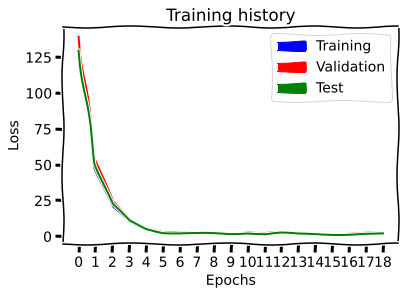

In [56]:
with plt.xkcd():
    plt.plot(train_stats[0]["training"]["combined"]["loss"], color="blue")
    plt.plot(train_stats[0]["validation"]["combined"]["loss"], color="red")
    plt.plot(train_stats[0]["test"]["combined"]["loss"], color="green")
    plt.legend(
        loc="best",
        handles=[
            Patch(label="Training", color="blue"),
            Patch(label="Validation", color="red"),
            Patch(label="Test", color="green"),
        ]
    )
    plt.title("Training history")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.xticks(np.arange(19))
    plt.grid()
    plt.show()

In [58]:
test_predictions = model.predict(test_features)

Preprocessing
Predicting
Prediction: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]
Postprocessing


In [60]:
test_predictions[0]

5-alpha_reductase_inhibitor_predictions  \
0                                    0.013324   
1                                    0.006100   
2                                   -0.046277   
3                                   -0.045482   
4                                    0.035021   
...                                       ...   
3977                                 0.017865   
3978                                 0.005599   
3979                                 0.053580   
3980                                -0.046579   
3981                                 0.038882   

      11-beta-hsd1_inhibitor_predictions  acat_inhibitor_predictions  \
0                               0.001383                    0.006468   
1                               0.026142                   -0.007024   
2                               0.029483                   -0.009153   
3                              -0.004189                   -0.029025   
4                               0.001769                    0.017106   
...                                  ...                         ...   
3977                            0.011809                   -0.009750   
3978                           -0.000624                    0.000312   
3979                            0.013026                    0.029949   
3980                            0.001434                    0.007398   
3981                            0.013677                    0.018837   

      acetylcholine_receptor_agonist_predictions  \
0                                       0.042330   
1                                       0.157227   
2                                      -0.031299   
3                                       0.037269   
4                                       0.014395   
...                                          ...   
3977                                    0.025096   
3978                                   -0.033844   
3979                                    0.101090   
3980                                   -0.015332   
3981                                    0.004867   

      acetylcholine_receptor_antagonist_predictions  \
0                                          0.003487   
1                                         -0.041637   
2                                          0.055167   
3                                         -0.044426   
4                                          0.006483   
...                                             ...   
3977                                      -0.031669   
3978                                       0.057044   
3979                                       0.003288   
3980                                      -0.083917   
3981                                      -0.060534   

      acetylcholinesterase_inhibitor_predictions  \
0                                      -0.009466   
1                                       0.020739   
2                                       0.008226   
3                                      -0.003655   
4                                       0.000332   
...                                          ...   
3977                                   -0.016830   
3978                                   -0.001357   
3979                                   -0.005187   
3980                                   -0.029284   
3981                                   -0.011832   

      adenosine_receptor_agonist_predictions  \
0                                   0.037496   
1                                   0.052232   
2                                  -0.004717   
3                                   0.008864   
4                                   0.054918   
...                                      ...   
3977                                0.002677   
3978                                0.013509   
3979                                0.062080   
3980                               -0.009240   
3981                                0.080865   

      adenosine_receptor_antagonist_predictions  \
0            

In [65]:
test_predictions[0].shape

(3982, 206)

In [69]:
sample = pd.read_csv("sample_submission.csv")

In [71]:
test_predictions[0].index = sample["sig_id"]

In [73]:
test_predictions[0].to_csv("ludwig_submission.csv")

### Loading trained model

In [17]:
trained = LudwigModel.load("results/api_experiment_run_0/model/")

In [18]:
trained.predict(test_features)

(      5-alpha_reductase_inhibitor_predictions  \
 0                                    0.013324   
 1                                    0.006100   
 2                                   -0.046277   
 3                                   -0.045482   
 4                                    0.035021   
 ...                                       ...   
 3977                                 0.017865   
 3978                                 0.005599   
 3979                                 0.053580   
 3980                                -0.046579   
 3981                                 0.038882   
 
       11-beta-hsd1_inhibitor_predictions  acat_inhibitor_predictions  \
 0                               0.001383                    0.006468   
 1                               0.026142                   -0.007024   
 2                               0.029483                   -0.009153   
 3                              -0.004189                   -0.029025   
 4                               